In [1]:
#Import sql library
import sqlite3

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Establishing a connection to the SQLite database file
con = sqlite3.connect("accident_data_v1.0.0_2023.db")

In [3]:
# Creating a cursor object to execute SQL queries
cur = con.cursor()

In [4]:
# Using PRAGMA to get information about the "accident" table
col_info = cur.execute("PRAGMA table_info(accident)")
accident_cols = col_info.fetchall()
accident_cols

[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

In [5]:
# Create an empty list to store the column names
accident_list = []

# Iterate over the accident_cols list and extract the second element from each item
for item in accident_cols:
    accident_list.append(item[1])

# Print the accident_list
print(accident_list)

['accident_index', 'accident_year', 'accident_reference', 'location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week', 'time', 'local_authority_district', 'local_authority_ons_district', 'local_authority_highway', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'lsoa_of_accident_location']


In [6]:
# Using PRAGMA to get information about the "vehicle" table
col_info2 = cur.execute("PRAGMA table_info(vehicle)")
vehicle_col = col_info2.fetchall()

# Print the column information for the "vehicle" table
vehicle_col

[(0, 'vehicle_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'vehicle_type', '', 0, None, 0),
 (6, 'towing_and_articulation', '', 0, None, 0),
 (7, 'vehicle_manoeuvre', '', 0, None, 0),
 (8, 'vehicle_direction_from', '', 0, None, 0),
 (9, 'vehicle_direction_to', '', 0, None, 0),
 (10, 'vehicle_location_restricted_lane', '', 0, None, 0),
 (11, 'junction_location', '', 0, None, 0),
 (12, 'skidding_and_overturning', '', 0, None, 0),
 (13, 'hit_object_in_carriageway', '', 0, None, 0),
 (14, 'vehicle_leaving_carriageway', '', 0, None, 0),
 (15, 'hit_object_off_carriageway', '', 0, None, 0),
 (16, 'first_point_of_impact', '', 0, None, 0),
 (17, 'vehicle_left_hand_drive', '', 0, None, 0),
 (18, 'journey_purpose_of_driver', '', 0, None, 0),
 (19, 'sex_of_driver', '', 0, None, 0),
 (20, 'age_of_driver', '', 0, None, 0),
 (21, 'age_band_of_driver', 

In [7]:
# Create an empty list to store the column names
vehicle_list = []

# Iterate over the vehicle_col list and extract the second element from each item
for item in vehicle_col:
    vehicle_list.append(item[1])

# Print the vehicle_list
print(vehicle_list)

['vehicle_index', 'accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to', 'vehicle_location_restricted_lane', 'junction_location', 'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway', 'hit_object_off_carriageway', 'first_point_of_impact', 'vehicle_left_hand_drive', 'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver', 'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code', 'age_of_vehicle', 'generic_make_model', 'driver_imd_decile', 'driver_home_area_type']


In [8]:
# Using PRAGMA to get information about the "casualty" table
col_info3 = cur.execute("PRAGMA table_info(casualty)")
casualty_col = col_info3.fetchall()

# Print the column information for the "casualty" table
casualty_col

[(0, 'casualty_index', '', 0, None, 1),
 (1, 'accident_index', '', 0, None, 0),
 (2, 'accident_year', '', 0, None, 0),
 (3, 'accident_reference', '', 0, None, 0),
 (4, 'vehicle_reference', '', 0, None, 0),
 (5, 'casualty_reference', '', 0, None, 0),
 (6, 'casualty_class', '', 0, None, 0),
 (7, 'sex_of_casualty', '', 0, None, 0),
 (8, 'age_of_casualty', '', 0, None, 0),
 (9, 'age_band_of_casualty', '', 0, None, 0),
 (10, 'casualty_severity', '', 0, None, 0),
 (11, 'pedestrian_location', '', 0, None, 0),
 (12, 'pedestrian_movement', '', 0, None, 0),
 (13, 'car_passenger', '', 0, None, 0),
 (14, 'bus_or_coach_passenger', '', 0, None, 0),
 (15, 'pedestrian_road_maintenance_worker', '', 0, None, 0),
 (16, 'casualty_type', '', 0, None, 0),
 (17, 'casualty_home_area_type', '', 0, None, 0),
 (18, 'casualty_imd_decile', '', 0, None, 0)]

In [9]:
# Create an empty list to store the column names
casualty_list = []

# Iterate over the casualty_col list and extract the second element from each item
for item in casualty_col:
    casualty_list.append(item[1])

# Print the casualty_list
print(casualty_list)

['casualty_index', 'accident_index', 'accident_year', 'accident_reference', 'vehicle_reference', 'casualty_reference', 'casualty_class', 'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty', 'casualty_severity', 'pedestrian_location', 'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker', 'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile']


In [10]:
# Using PRAGMA to get information about the "lsoa" table
col_info3 = cur.execute("PRAGMA table_info(lsoa)")
lsoa_col = col_info3.fetchall()

# Print the column information for the "lsoa" table
lsoa_col

[(0, 'objectid', '', 0, None, 1),
 (1, 'lsoa01cd', '', 0, None, 0),
 (2, 'lsoa01nm', '', 0, None, 0),
 (3, 'lsoa01nmw', '', 0, None, 0),
 (4, 'shape__area', '', 0, None, 0),
 (5, 'shape__length', '', 0, None, 0),
 (6, 'globalid', '', 0, None, 0)]

In [11]:
# Create a list comprehension to extract the second element from each item in lsoa_col
lsoa_list = [item[1] for item in lsoa_col]

# Print the lsoa_list
lsoa_list

['objectid',
 'lsoa01cd',
 'lsoa01nm',
 'lsoa01nmw',
 'shape__area',
 'shape__length',
 'globalid']

### Checking the count of rows

In [12]:
# Execute a query to count the number of rows in the "accident" table with the specified condition
count_acc = cur.execute("SELECT COUNT(*) FROM accident WHERE accident_year  = 2020" )

# Fetch the result of the count query
count_accident = count_acc.fetchall()

# Print the count of accidents in the specified year
count_accident

[(91199,)]

In [13]:
# Execute a query to count the number of rows in the "vehicle" table with the specified condition
count_vec = cur.execute("SELECT COUNT(*) FROM vehicle WHERE accident_year  = 2020")

# Fetch the result of the count query
count_vehicle = count_vec.fetchall()

# Print the count of vehicles in the specified year
print(count_vehicle)

[(167375,)]


In [14]:
# Execute a query to count the number of rows in the "casualty" table with the specified condition
count_cas = cur.execute("SELECT COUNT(*) FROM casualty WHERE accident_year  = 2020")

# Fetch the result of the count query
count_casualty = count_cas.fetchall()

# Print the count of casualties in the specified year
print(count_casualty)

[(115584,)]


In [15]:
# Execute a query to count the number of rows in the "casualty" table with the specified condition
count_lsoa_ = cur.execute("SELECT COUNT(*) FROM lsoa")

# Fetch the result of the count query
count_lsoa = count_lsoa_.fetchall()

# Print the count of casualties in the specified year
print(count_lsoa)

[(34378,)]


### Creating dataframes for Accident Table

In [16]:
# Execute a query to retrieve all rows from the "accident" table with the specified condition
acc = cur.execute("SELECT * FROM accident WHERE accident_year = 2020")

# Fetch all the rows returned by the query
accidents = acc.fetchall()

# Print the retrieved rows (accidents)
accidents

[('2020010219808',
  2020,
  '010219808',
  521389.0,
  175144.0,
  -0.254001,
  51.462262,
  1,
  3,
  1,
  1,
  '04/02/2020',
  3,
  '09:00',
  10,
  'E09000032',
  'E09000032',
  6,
  0,
  6,
  20,
  0,
  -1,
  0,
  -1,
  9,
  9,
  1,
  9,
  9,
  0,
  0,
  1,
  3,
  2,
  'E01004576'),
 ('2020010220496',
  2020,
  '010220496',
  529337.0,
  176237.0,
  -0.139253,
  51.470327,
  1,
  3,
  1,
  2,
  '27/04/2020',
  2,
  '13:55',
  9,
  'E09000022',
  'E09000022',
  3,
  3036,
  6,
  20,
  9,
  2,
  6,
  0,
  0,
  4,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  2,
  'E01003034'),
 ('2020010228005',
  2020,
  '010228005',
  526432.0,
  182761.0,
  -0.178719,
  51.529614,
  1,
  3,
  1,
  1,
  '01/01/2020',
  4,
  '01:25',
  1,
  'E09000033',
  'E09000033',
  5,
  0,
  6,
  30,
  3,
  1,
  6,
  0,
  0,
  0,
  4,
  1,
  2,
  0,
  0,
  1,
  1,
  2,
  'E01004726'),
 ('2020010228006',
  2020,
  '010228006',
  538676.0,
  184371.0,
  -0.001683,
  51.54121,
  1,
  2,
  1,
  1,
  '01/01/2020',
  4,
  '0

In [17]:
import pandas as pd
# Importing the pandas library for data manipulation and analysis

# Create a DataFrame from the retrieved rows (accidents) and assign the column names
acc_df = pd.DataFrame(accidents, columns=accident_list)

# Print the DataFrame
acc_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


### Creating dataframes for Vehicle Table

In [18]:
# Execute a query to retrieve all rows from the "vehicle" table with the specified condition
vec = cur.execute("SELECT * FROM vehicle WHERE accident_year = 2020")

# Fetch all the rows returned by the query
vehicles = vec.fetchall()

# Print the retrieved rows (vehicles)
vehicles

[(681716,
  '2020010219808',
  2020,
  '010219808',
  1,
  9,
  9,
  5,
  1,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  9,
  6,
  2,
  32,
  6,
  1968,
  2,
  6,
  'AUDI Q5',
  4,
  1),
 (681717,
  '2020010220496',
  2020,
  '010220496',
  1,
  9,
  0,
  4,
  2,
  6,
  0,
  2,
  0,
  0,
  0,
  0,
  1,
  1,
  2,
  1,
  45,
  7,
  1395,
  1,
  2,
  'AUDI A1',
  7,
  1),
 (681718,
  '2020010228005',
  2020,
  '010228005',
  1,
  9,
  0,
  18,
  -1,
  -1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  6,
  3,
  -1,
  -1,
  -1,
  -1,
  -1,
  '-1',
  -1,
  -1),
 (681719,
  '2020010228006',
  2020,
  '010228006',
  1,
  8,
  0,
  18,
  1,
  5,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  44,
  7,
  1798,
  8,
  8,
  'TOYOTA PRIUS',
  2,
  1),
 (681720,
  '2020010228011',
  2020,
  '010228011',
  1,
  9,
  0,
  18,
  3,
  7,
  9,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  6,
  1,
  20,
  4,
  2993,
  2,
  4,
  'BMW 4 SERIES',
  -1,
  -1),
 (681721,
  '2020010228012',
  2020,
  '010228012',
  1,
  9

In [19]:
# Create a DataFrame from the retrieved rows (vehicles) and assign the column names

vec_df = pd.DataFrame(vehicles, columns=vehicle_list)


# Print the DataFrame
vec_df

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,...,6,2,32,6,1968,2,6,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,...,2,1,45,7,1395,1,2,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,...,1,1,44,7,1798,8,8,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,6,1,20,4,2993,2,4,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,...,1,1,57,9,1968,2,2,AUDI A5,7,1
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,...,5,1,38,7,1301,1,2,KTM 1290 SUPERDUKE,9,2
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,...,6,2,68,10,1995,2,1,BMW X3,5,1
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,...,6,1,76,11,-1,-1,-1,-1,9,1


### Creating dataframes for Casualty Table

In [20]:
# Execute a query to retrieve all rows from the "casualty" table with the specified condition
cas = cur.execute("SELECT * FROM casualty WHERE accident_year = 2020")

# Fetch all the rows returned by the query
casualties = cas.fetchall()

# Print the retrieved rows (casualties)
casualties

[(484748,
  '2020010219808',
  2020,
  '010219808',
  1,
  1,
  3,
  1,
  31,
  6,
  3,
  9,
  5,
  0,
  0,
  0,
  0,
  1,
  4),
 (484749,
  '2020010220496',
  2020,
  '010220496',
  1,
  1,
  3,
  2,
  2,
  1,
  3,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  2),
 (484750,
  '2020010220496',
  2020,
  '010220496',
  1,
  2,
  3,
  2,
  4,
  1,
  3,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  2),
 (484751,
  '2020010228005',
  2020,
  '010228005',
  1,
  1,
  3,
  1,
  23,
  5,
  3,
  5,
  9,
  0,
  0,
  0,
  0,
  1,
  3),
 (484752,
  '2020010228006',
  2020,
  '010228006',
  1,
  1,
  3,
  1,
  47,
  8,
  2,
  4,
  1,
  0,
  0,
  0,
  0,
  1,
  3),
 (484753,
  '2020010228011',
  2020,
  '010228011',
  1,
  1,
  3,
  2,
  32,
  6,
  3,
  6,
  9,
  0,
  0,
  0,
  0,
  1,
  8),
 (484754,
  '2020010228011',
  2020,
  '010228011',
  1,
  2,
  3,
  2,
  33,
  6,
  3,
  6,
  9,
  0,
  0,
  0,
  0,
  -1,
  -1),
 (484755,
  '2020010228012',
  2020,
  '010228012',
  1,
  1,
  1,
  1,
  25,
  5,
  3,
  0,
  0,

In [21]:
# Create a DataFrame from the retrieved rows (casualties) and assign the column names
cas_df = pd.DataFrame(casualties, columns=casualty_list)

# Print the DataFrame
cas_df

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


### Creating dataframes for Lsoa Table

In [22]:
# Execute a query to retrieve all rows from the "lsoa" table with the specified condition
lsoa_ = cur.execute("SELECT * FROM lsoa")

# Fetch all the rows returned by the query
lsoa = lsoa_.fetchall()

# Print the retrieved rows (lsoa)
lsoa

[(1,
  'E01000001',
  'City of London 001A',
  'City of London 001A',
  129865.232551575,
  2635.77200095126,
  '68cc6127-1008-4fbe-a16c-78fb089a7c43'),
 (2,
  'E01000002',
  'City of London 001B',
  'City of London 001B',
  228418.896621704,
  2707.98620166511,
  '937edbc3-c1bf-4d35-b274-b0a1480a7c09'),
 (3,
  'E01000003',
  'City of London 001C',
  'City of London 001C',
  59054.7690048218,
  1224.77447915666,
  '2686dcaf-10b9-4736-92af-4788d4feaa69'),
 (4,
  'E01000004',
  'City of London 001D',
  'City of London 001D',
  2544551.14173126,
  10718.4662400471,
  '3c493140-0b3f-4b9a-b358-22011dc5fb89'),
 (5,
  'E01000005',
  'City of London 001E',
  'City of London 001E',
  189578.164024353,
  2275.8093576013,
  'b569093d-788d-41be-816c-d6d7658b2311'),
 (6,
  'E01000006',
  'Barking and Dagenham 016A',
  'Barking and Dagenham 016A',
  146536.3332901,
  1966.13897042181,
  '0c8f097b-5cb2-4a07-a821-64159adecf58'),
 (7,
  'E01000007',
  'Barking and Dagenham 015A',
  'Barking and Dagenha

In [23]:
# Create a DataFrame from the retrieved rows (casualties) and assign the column names
lsoa_df = pd.DataFrame(lsoa, columns=lsoa_list)

# Print the DataFrame
lsoa_df

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311
...,...,...,...,...,...,...,...
34373,34374,W01001892,Cardiff 020D,Caerdydd 020D,2.699088e+05,2537.220060,1a25aa1e-5db5-4d32-8355-473409dbd69f
34374,34375,W01001893,Cardiff 010B,Caerdydd 010B,4.288488e+06,9807.284401,b6af5e24-eb2a-404a-98a6-a282037b3e10
34375,34376,W01001894,Cardiff 010C,Caerdydd 010C,3.337511e+05,2929.546177,72d16f53-115d-4926-936d-2f1b1d659d46
34376,34377,W01001895,Cardiff 010D,Caerdydd 010D,1.360174e+06,8141.281226,8e105eb9-f68e-4cdb-bca6-b49f6592cb71


### 1. Data Cleaning

##### Checking for null entries in tables

In [24]:
# Formular for checking null entries in datarames

def check_null_entries(df):
    null_counts = df.isnull().sum()
    null_summary = pd.DataFrame({
        'Column Name': null_counts.index,
        'Null Count': null_counts.values,
    })
    return null_summary


In [25]:
# Checking Null entries in the accident dataframe
result = check_null_entries(acc_df)
print(result)

                                    Column Name  Null Count
0                                accident_index           0
1                                 accident_year           0
2                            accident_reference           0
3                         location_easting_osgr          14
4                        location_northing_osgr          14
5                                     longitude          14
6                                      latitude          14
7                                  police_force           0
8                             accident_severity           0
9                            number_of_vehicles           0
10                         number_of_casualties           0
11                                         date           0
12                                  day_of_week           0
13                                         time           0
14                     local_authority_district           0
15                 local_authority_ons_d

In [26]:
# Checking Null entries in the vehicle dataframe
result = check_null_entries(vec_df)
print(result)

                         Column Name  Null Count
0                      vehicle_index           0
1                     accident_index           0
2                      accident_year           0
3                 accident_reference           0
4                  vehicle_reference           0
5                       vehicle_type           0
6            towing_and_articulation           0
7                  vehicle_manoeuvre           0
8             vehicle_direction_from           0
9               vehicle_direction_to           0
10  vehicle_location_restricted_lane           0
11                 junction_location           0
12          skidding_and_overturning           0
13         hit_object_in_carriageway           0
14       vehicle_leaving_carriageway           0
15        hit_object_off_carriageway           0
16             first_point_of_impact           0
17           vehicle_left_hand_drive           0
18         journey_purpose_of_driver           0
19                  

In [27]:
# Checking Null entries in the casualty dataframe
result = check_null_entries(cas_df)
print(result)

                           Column Name  Null Count
0                       casualty_index           0
1                       accident_index           0
2                        accident_year           0
3                   accident_reference           0
4                    vehicle_reference           0
5                   casualty_reference           0
6                       casualty_class           0
7                      sex_of_casualty           0
8                      age_of_casualty           0
9                 age_band_of_casualty           0
10                   casualty_severity           0
11                 pedestrian_location           0
12                 pedestrian_movement           0
13                       car_passenger           0
14              bus_or_coach_passenger           0
15  pedestrian_road_maintenance_worker           0
16                       casualty_type           0
17             casualty_home_area_type           0
18                 casualty_imd

##### Filling the missing entries in accident df with median

In [28]:
# formular to fill missing entries with median values

def fill_missing_with_median(df, columns):

    for col in columns:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        
    return df

In [29]:
# executing fill_missing_with_median formular

columns_to_fill = ['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude']

acc_df = fill_missing_with_median(acc_df, columns_to_fill)


In [30]:
# Checking Null entries in the accident dataframe
result = check_null_entries(acc_df)
print(result)

                                    Column Name  Null Count
0                                accident_index           0
1                                 accident_year           0
2                            accident_reference           0
3                         location_easting_osgr           0
4                        location_northing_osgr           0
5                                     longitude           0
6                                      latitude           0
7                                  police_force           0
8                             accident_severity           0
9                            number_of_vehicles           0
10                         number_of_casualties           0
11                                         date           0
12                                  day_of_week           0
13                                         time           0
14                     local_authority_district           0
15                 local_authority_ons_d

## 2. To do SQL Commands:

### A. Are there significant hours of the day on which accidents occur?

In [31]:
# Executing the SQL query
cur.execute("""
    SELECT SUBSTRING(time, 1, 2) AS HourOfDay,
    COUNT(*) AS AccidentCount
    FROM accident
    WHERE accident_year = 2020
    GROUP BY SUBSTRING(time, 1, 2)
    ORDER BY AccidentCount DESC;
    
""")

# Fetching the result of the query
results = cur.fetchall()
#results

acc_hours = pd.DataFrame(results, columns = ['Hour', 'Count of Accidents'])
# Printing the DataFrame
acc_hours


,Hour,Count of Accidents
0,17,7813
1,16,7381
2,15,7361
3,18,6618
4,14,6245
5,13,5741
6,12,5395
7,08,5267
8,19,5048
9,11,4812


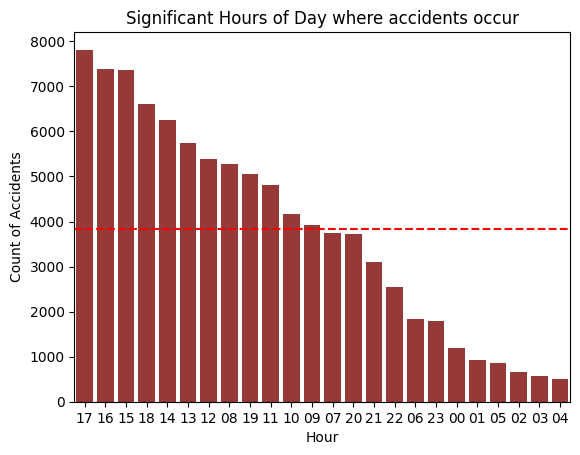

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# finding median count of accidents 
median_count = acc_hours['Count of Accidents'].median()

# Define the color you want for the bars
bar_color = 'brown'  # Change this to any color you prefer, e.g., 'green', 'red', 'purple', etc.

# Create the bar plot with the specified color
sns.barplot(data=acc_hours, x='Hour', y='Count of Accidents', color=bar_color)
plt.title('Significant Hours of Day where accidents occur')

# Add a line for the median count
plt.axhline(y=median_count, color='red', linestyle='dashed', label='Median Count')

# Save the plot as a PNG image
plt.savefig('Significant Hours of Day where accidents occur.png', bbox_inches='tight')

# Show the plot
plt.show()


##### Typical accident hours are from 8am to 7pm across the country

### B.  Are there significant days of the week on which accidents occur?

In [33]:
# Executing the SQL query
cur.execute("""
            SELECT
                CASE
                    WHEN day_of_week = 1 THEN 'Sunday'
                    WHEN day_of_week = 2 THEN 'Monday'
                    WHEN day_of_week = 3 THEN 'Tuesday'
                    WHEN day_of_week = 4 THEN 'Wednesday'
                    WHEN day_of_week = 5 THEN 'Thursday'
                    WHEN day_of_week = 6 THEN 'Friday'
                    WHEN day_of_week = 7 THEN 'Saturday'
                END AS Day_Of_Week,
            COUNT(*) AS Accident_Count
        FROM accident
        WHERE accident_year = 2020
        GROUP BY day_of_week
        ORDER BY Accident_Count DESC;
            """)

# Fetching the result of the query
results = cur.fetchall()
#results

acc_days = pd.DataFrame(results, columns = ['Days', 'Count of Accidents'])
# Printing the DataFrame
acc_days


,Days,Count of Accidents
0,Friday,14889
1,Thursday,14056
2,Wednesday,13564
3,Tuesday,13267
4,Monday,12772
5,Saturday,12336
6,Sunday,10315


In [34]:
days = pd.DataFrame({'Days': ['Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Saturday', 'Sunday'],
                     'Count of Accidents': [14889, 14056, 13564, 13267, 12772, 12336, 10315]})

# Compute percentage of each item
total = days['Count of Accidents'].sum()
days['Percentage'] = round(days['Count of Accidents'] / total * 100, 1)

# Display the result
days


,Days,Count of Accidents,Percentage
0,Friday,14889,16.3
1,Thursday,14056,15.4
2,Wednesday,13564,14.9
3,Tuesday,13267,14.5
4,Monday,12772,14.0
5,Saturday,12336,13.5
6,Sunday,10315,11.3


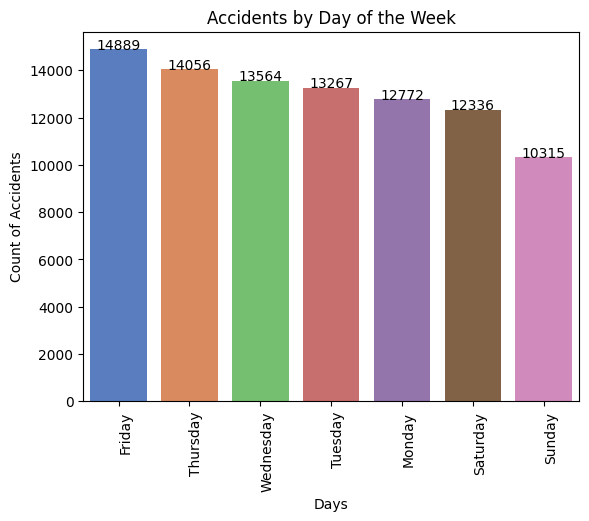

In [35]:
# Create stacked bar chart of occupation classification by gender and religion
occupation_chart = sns.barplot(data=days, x='Days', y='Count of Accidents', palette='muted')
plt.xticks(rotation=90, ha='left')
plt.title('Accidents by Day of the Week')

# Get the counts for each category and sort in the order of the countplot
counts = days['Count of Accidents'].tolist()

# Add annotations to the plot using the sorted counts dataframe
for i, count in enumerate(counts):
    plt.text(i, count+1, str(count), ha='center')

# Save the plot as a PNG image
plt.savefig('Accidents_by_Day_of_the_Week.png', bbox_inches='tight')


##### accidents mostly occur on Fridays , thursday and wednesday thus the second part of working days has more accident counts

### C. The top 10 cities with the most count of accidents

In [36]:
# Executing the SQL query
cur.execute("""
    SELECT
        SUBSTR(lsoa01nm, 1, LENGTH(lsoa01nm) - 4) AS City,
        COUNT(*) AS Accident_Count
    FROM accident AS a
    JOIN lsoa AS l ON a.lsoa_of_accident_location = l.lsoa01cd
    WHERE a.accident_year = 2020
    GROUP BY City
    ORDER BY Accident_Count DESC
    LIMIT 10;
""")

# Fetching the result of the query and storing it in a pandas DataFrame
results = cur.fetchall()
acc_cities = pd.DataFrame(results, columns = ['Top 10 Cities', 'Count of accidents'])
# Printing the DataFrame
acc_cities

,Top 10 Cities,Count of accidents
0,Birmingham,1558
1,Lambeth,1028
2,Westminster,929
3,Croydon,887
4,Leeds,874
5,Wandsworth,871
6,Enfield,829
7,Ealing,805
8,Southwark,803
9,Tower Hamlets,794


##### Birmingham the largest count of accidents in the year 2020

### D. The number of accidents in Kingston Upon Hull

In [37]:
# Executing the SQL query
cur.execute("""
SELECT
    COUNT(*) AS Total_Accidents
FROM accident AS a
JOIN lsoa AS l ON a.lsoa_of_accident_location = l.lsoa01cd
WHERE a.accident_year = 2020 AND lsoa01nm LIKE '%Kingston Upon Hull%';
""")

# Fetching the result of the query
result = cur.fetchone()

# Formatting and printing the result using f-strings
print(f"The number of accidents in Kingston Upon Hull in 2020 is {result[0]}")

The number of accidents in Kingston Upon Hull in 2020 is 569


### E. The number of accidents in East Riding of Yorkshire

In [38]:
# Executing the SQL query
cur.execute("""
SELECT
    COUNT(*) AS Total_Accidents
FROM accident AS a
JOIN lsoa AS l ON a.lsoa_of_accident_location = l.lsoa01cd
WHERE a.accident_year = 2020 AND lsoa01nm LIKE '%East Riding of Yorkshire%';
""")

# Fetching the result of the query
result = cur.fetchone()

# Formatting and printing the result using f-strings
print(f"The number of accidents in East Riding of Yorkshire in 2020 is {result[0]}")

The number of accidents in East Riding of Yorkshire in 2020 is 488


### F. The number of accidents in North Lincolnshire

In [39]:
# Executing the SQL query
cur.execute("""
SELECT
    COUNT(*) AS Total_Accidents
FROM accident AS a
JOIN lsoa AS l ON a.lsoa_of_accident_location = l.lsoa01cd
WHERE a.accident_year = 2020 AND lsoa01nm LIKE '%North Lincolnshire%';
""")

# Fetching the result of the query
result = cur.fetchone()

# Formatting and printing the result using f-strings
print(f"The number of accidents in North Lincolnshire in 2020 is {result[0]}")

The number of accidents in North Lincolnshire in 2020 is 304


### G.The number of accidents in North East Lincolnshire

In [40]:
# Executing the SQL query
cur.execute("""
SELECT
    COUNT(*) AS Total_Accidents
FROM accident AS a
JOIN lsoa AS l ON a.lsoa_of_accident_location = l.lsoa01cd
WHERE a.accident_year = 2020 AND lsoa01nm LIKE '%North East Lincolnshire%';
""")

# Fetching the result of the query
result = cur.fetchone()

# Formatting and printing the result using f-strings
print(f"The number of accidents in North East Lincolnshire in 2020 is {result[0]}")

The number of accidents in North East Lincolnshire in 2020 is 302


### H. Top 10 vehicles involved in accidents

In [41]:
# Executing the SQL query
cur.execute("""
    SELECT
        CASE vehicle_type
            WHEN 9 THEN 'Car'
            WHEN 8 THEN 'Taxi / Private hire car'
            WHEN 19 THEN 'Van - Goods vehicle 3.5 tonnes'
            WHEN 20 THEN 'Goods vehicle over 3.5 tonnes and under 7.5 tonnes'
            WHEN 21 THEN 'Goods vehicle 7.5 tonnes and over'
            WHEN 98 THEN 'Goods vehicle - unknown weight'
            WHEN 2 THEN 'M/cycle 50cc and under'
            WHEN 3 THEN 'M/cycle over 50cc and up to 125cc'
            WHEN 4 THEN 'M/cycle over 125cc and up to 500cc'
            WHEN 5 THEN 'Motorcycle over 500cc'
            WHEN 97 THEN 'Motorcycle - cc unknown'
            WHEN 23 THEN 'Electric Motorcycle'
            WHEN 1 THEN 'Pedal cycle'
            WHEN 11 THEN 'Bus or coach (17 or more passenger seat)'
            WHEN 10 THEN 'Minibus (8-16 passenger seats)'
            WHEN 17 THEN 'Agricultural vehicle (include diggers etc)'
            WHEN 16 THEN 'Ridden horse'
            WHEN 22 THEN 'Mobility scooter'
            WHEN 18 THEN 'Tram / Light rail'
            WHEN 90 THEN 'Other Vehicle'
        END AS Vehicle_Type,
        COUNT(*) AS Accident_Count
    FROM accident AS a
    JOIN vehicle AS v ON a.accident_index = v.accident_index
    WHERE a.accident_year = 2020
    GROUP BY Vehicle_Type
    ORDER BY Accident_Count DESC
    LIMIT 10;
""")

# Fetching the result of the query and storing it in a pandas DataFrame
results = cur.fetchall()
acc_vehicles = pd.DataFrame(results, columns = ['Vehicle Type', 'Count of accidents'])
# Printing the DataFrame
acc_vehicles

,Vehicle Type,Count of accidents
0,Car,114145
1,Pedal cycle,16766
2,Van - Goods vehicle 3.5 tonnes,10338
3,M/cycle over 50cc and up to 125cc,7523
4,Motorcycle over 500cc,3784
5,Taxi / Private hire car,2612
6,Goods vehicle 7.5 tonnes and over,2501
7,Bus or coach (17 or more passenger seat),2213
8,M/cycle over 125cc and up to 500cc,1691
9,Other Vehicle,1185


### I. Ages of casualties

In [42]:
# Executing the SQL query
cur.execute("""
    SELECT
        c.age_of_casualty AS Casualty_Age,
        COUNT(*) AS Casualty_Count
    FROM casualty AS c
    JOIN accident AS a ON c.accident_index = a.accident_index
    WHERE a.accident_year = 2020
    GROUP BY c.age_of_casualty
    ORDER BY Casualty_Count DESC
    LIMIT 10;
""")

# Fetching the result of the query and storing it in a pandas DataFrame
results = cur.fetchall()
cas_age = pd.DataFrame(results, columns = ['Casualty Age', 'Count of accidents'])
# Printing the DataFrame
cas_age

,Casualty Age,Count of accidents
0,30,3135
1,19,2881
2,20,2796
3,25,2749
4,26,2739
5,28,2738
6,23,2718
7,22,2718
8,24,2699
9,18,2686


### J. Severity of Casualties

In [43]:
# Executing the SQL query
cur.execute("""
    SELECT
        CASE casualty_severity
            WHEN 1 THEN 'Fatal'
            WHEN 2 THEN 'Serious'
            WHEN 3 THEN 'Slight'
        END AS Casualty_Severity,
        COUNT(*) AS Casualty_Count
    FROM casualty
    WHERE accident_year = 2020
    GROUP BY casualty_severity;
""")

# Fetching the result of the query and storing it in a pandas DataFrame
results = cur.fetchall()
cas_severity = pd.DataFrame(results, columns = ['Casualty Severity', 'Count of accidents'])
# Printing the DataFrame
cas_severity

,Casualty Severity,Count of accidents
0,Fatal,1460
1,Serious,20102
2,Slight,94022


### K. Class of casualties

In [44]:
# Executing the SQL query
cur.execute("""
    SELECT
        CASE casualty_class
            WHEN 1 THEN 'Driver/Rider'
            WHEN 2 THEN 'Vehicle/Pillion Passenger'
            WHEN 3 THEN 'Pedestrian'
        END AS Casualty_Class,
        COUNT(*) AS Casualty_Count
    FROM casualty
    WHERE accident_year = 2020
    GROUP BY casualty_class;
""")

# Fetching the result of the query and storing it in a pandas DataFrame
results = cur.fetchall()
cas_class = pd.DataFrame(results, columns = ['Casualty Class', 'Count of accidents'])
# Printing the DataFrame
cas_class

,Casualty Class,Count of accidents
0,Driver/Rider,79330
1,Vehicle/Pillion Passenger,21504
2,Pedestrian,14750


### L. Significant hours of the day where motorcycle accident happens

In [45]:
# Executing the SQL query
cur.execute("""
    SELECT
        SUBSTR(time, 1, 2) AS Hour,
        COUNT(*) AS Accident_Count
    FROM accident AS a
    JOIN vehicle AS v ON a.accident_index = v.accident_index
    WHERE a.accident_year = 2020
        AND v.vehicle_type IN (02, 03, 04, 05)
    GROUP BY Hour
    ORDER BY Accident_Count DESC;

""")

# Fetching the result of the query and storing it in a pandas DataFrame
results = cur.fetchall()
Mcyle_hours = pd.DataFrame(results, columns = ['Hour', 'Count of accidents'])
# Printing the DataFrame
Mcyle_hours

,Hour,Count of accidents
0,17,1401
1,16,1229
2,18,1176
3,15,1134
4,14,1059
5,13,1036
6,19,925
7,12,853
8,20,728
9,11,692


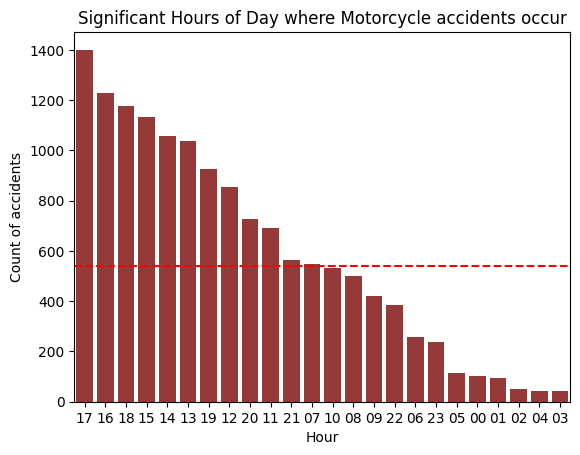

In [46]:

# finding median count of accidents 
median_count = Mcyle_hours['Count of accidents'].median()

# Define the color you want for the bars
bar_color = 'brown'  # Change this to any color you prefer, e.g., 'green', 'red', 'purple', etc.

# Create the bar plot with the specified color
sns.barplot(data=Mcyle_hours, x='Hour', y='Count of accidents', color=bar_color)
plt.title('Significant Hours of Day where Motorcycle accidents occur')

# Add a line for the median count
plt.axhline(y=median_count, color='red', linestyle='dashed', label='Median Count')

# Save the plot as a PNG image
plt.savefig('Significant Hours of Day where Motorcycle accidents occur.png', bbox_inches='tight')

# Show the plot
plt.show()


In [47]:
median_count = Mcyle_hours['Count of accidents'].median()
median_count

540.5

In [48]:
# Executing the SQL query
cur.execute("""
    SELECT
        SUBSTR(time, 1, 2) AS Hour,
        CASE 
            WHEN v.vehicle_type IN (2, 3) THEN 'Motorcycle 125cc and under'
            WHEN v.vehicle_type = 4 THEN 'Motorcycle over 125cc and up to 500cc'
            WHEN v.vehicle_type = 5 THEN 'Motorcycle over 500cc'
            ELSE 'Other'
        END AS VehicleType,
        COUNT(*) AS Count_of_Mcycle_accidents
    FROM accident AS a
    JOIN vehicle AS v ON a.accident_index = v.accident_index
    WHERE a.accident_year = 2020
        AND v.vehicle_type IN (2, 3, 4, 5)
    GROUP BY Hour, VehicleType
    ORDER BY Hour, VehicleType, Count_of_Mcycle_accidents DESC;
""")

# Fetching the result of the query and storing it in a pandas DataFrame
results = cur.fetchall()
mcycle_hourly_accidents = pd.DataFrame(results, columns=['Hour', 'VehicleType', 'Count_of_Mcycle_accidents'])

# Printing the DataFrame
mcycle_hourly_accidents[:59]


,Hour,VehicleType,Count_of_Mcycle_accidents
0,00,Motorcycle 125cc and under,73
1,00,Motorcycle over 125cc and up to 500cc,17
2,00,Motorcycle over 500cc,11
3,01,Motorcycle 125cc and under,60
4,01,Motorcycle over 125cc and up to 500cc,18
5,01,Motorcycle over 500cc,17
6,02,Motorcycle 125cc and under,37
7,02,Motorcycle over 125cc and up to 500cc,4
8,02,Motorcycle over 500cc,8
9,03,Motorcycle 125cc and under,30


In [49]:
mcycle_hourly_accidents[59:]

,Hour,VehicleType,Count_of_Mcycle_accidents
59,19,Motorcycle over 500cc,163
60,20,Motorcycle 125cc and under,534
61,20,Motorcycle over 125cc and up to 500cc,82
62,20,Motorcycle over 500cc,112
63,21,Motorcycle 125cc and under,424
64,21,Motorcycle over 125cc and up to 500cc,56
65,21,Motorcycle over 500cc,83
66,22,Motorcycle 125cc and under,291
67,22,Motorcycle over 125cc and up to 500cc,38
68,22,Motorcycle over 500cc,56


### M. Significant day of the week where motorcycle accident happens

In [50]:
# Executing the SQL query
cur.execute("""
    SELECT
        CASE day_of_week
            WHEN 1 THEN 'Sunday'
            WHEN 2 THEN 'Monday'
            WHEN 3 THEN 'Tuesday'
            WHEN 4 THEN 'Wednesday'
            WHEN 5 THEN 'Thursday'
            WHEN 6 THEN 'Friday'
            WHEN 7 THEN 'Saturday'
        END AS DayOfWeek,
        COUNT(*) AS Accident_Count
    FROM accident AS a
    JOIN vehicle AS v ON a.accident_index = v.accident_index
    WHERE a.accident_year = 2020
        AND v.vehicle_type IN (02, 03, 04, 05)
    GROUP BY day_of_week
    ORDER BY Accident_Count DESC;

""")

# Fetching the result of the query and storing it in a pandas DataFrame
results = cur.fetchall()
mcycle_acc_days = pd.DataFrame(results, columns = ['Days', 'Count of Mcycle accidents'])
# Printing the DataFrame
mcycle_acc_days

,Days,Count of Mcycle accidents
0,Friday,2308
1,Thursday,2172
2,Saturday,2003
3,Wednesday,2001
4,Tuesday,1933
5,Monday,1868
6,Sunday,1841


In [51]:
# Defining the SQL query
cur.execute("""
    SELECT
        CASE day_of_week
            WHEN 1 THEN 'Sunday'
            WHEN 2 THEN 'Monday'
            WHEN 3 THEN 'Tuesday'
            WHEN 4 THEN 'Wednesday'
            WHEN 5 THEN 'Thursday'
            WHEN 6 THEN 'Friday'
            WHEN 7 THEN 'Saturday'
        END AS Days,
        CASE 
            WHEN v.vehicle_type IN (2, 3) THEN 'Motorcycle 125cc and under'
            WHEN v.vehicle_type = 4 THEN 'Motorcycle over 125cc and up to 500cc'
            WHEN v.vehicle_type = 5 THEN 'Motorcycle over 500cc'
            ELSE 'Other'
        END AS VehicleType,
        COUNT(*) AS Count_of_Mcycle_accidents
    FROM accident AS a
    JOIN vehicle AS v ON a.accident_index = v.accident_index
    WHERE a.accident_year = 2020
        AND (v.vehicle_type IN (2, 3, 4, 5))
    GROUP BY day_of_week, VehicleType
    ORDER BY day_of_week, VehicleType, Count_of_Mcycle_accidents DESC;
""")

# Fetching the result of the query and storing it in a pandas DataFrame
results = cur.fetchall()
mcycle_acc_days = pd.DataFrame(results, columns=['Days', 'VehicleType', 'Count_of_Mcycle_accidents'])

# Printing the DataFrame
mcycle_acc_days


,Days,VehicleType,Count_of_Mcycle_accidents
0,Sunday,Motorcycle 125cc and under,948
1,Sunday,Motorcycle over 125cc and up to 500cc,218
2,Sunday,Motorcycle over 500cc,675
3,Monday,Motorcycle 125cc and under,1173
4,Monday,Motorcycle over 125cc and up to 500cc,227
5,Monday,Motorcycle over 500cc,468
6,Tuesday,Motorcycle 125cc and under,1202
7,Tuesday,Motorcycle over 125cc and up to 500cc,234
8,Tuesday,Motorcycle over 500cc,497
9,Wednesday,Motorcycle 125cc and under,1249


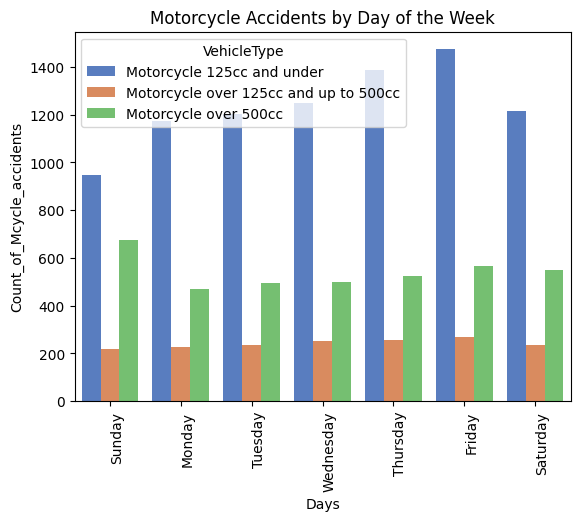

In [52]:
# Create stacked bar chart of motorcycle accidents by day of the week, separated by vehicle types
occupation_chart = sns.barplot(data=mcycle_acc_days, x='Days', y='Count_of_Mcycle_accidents', hue='VehicleType', palette='muted')
#plt.figure(figsize=(12, 12))
plt.xticks(rotation=90, ha='left')
plt.title('Motorcycle Accidents by Day of the Week')

# Get the counts for each category and sort in the order of the countplot
counts = mcycle_acc_days['Count_of_Mcycle_accidents'].tolist()

# Add annotations to the plot using the sorted counts dataframe
#for i, count in enumerate(counts):
#    plt.text(i, count + 1, str(count), ha='center')

# Adjust y-axis limits for better visibility of annotations
#plt.ylim(0, max(counts) + 10)

# Save the plot as a PNG image
plt.savefig('Motorcycle_Accidents_by_Day_of_the_Week1.png', bbox_inches='tight')


### N. For pedestrians involved in accidents, are there significant hours of the day, on which they are more likely to be involved

In [53]:
# Executing the SQL query
cur.execute("""
    SELECT
        SUBSTR(time, 1, 2) AS Hour,
        COUNT(*) AS Accident_Count
    FROM accident AS a
    JOIN casualty AS c ON a.accident_index = c.accident_index
    WHERE a.accident_year = 2020
        AND c.casualty_class = 3 -- Pedestrian
    GROUP BY Hour
    ORDER BY Accident_Count DESC;

""")

# Fetching the result of the query and storing it in a pandas DataFrame
results = cur.fetchall()
ped_acc_hour = pd.DataFrame(results, columns = ['Hour', 'Count of Pedestrain accidents'])
# Printing the DataFrame
ped_acc_hour

,Hour,Count of Pedestrain accidents
0,15,1672
1,16,1323
2,17,1274
3,18,1146
4,08,1060
5,14,1015
6,13,833
7,19,824
8,12,809
9,11,725


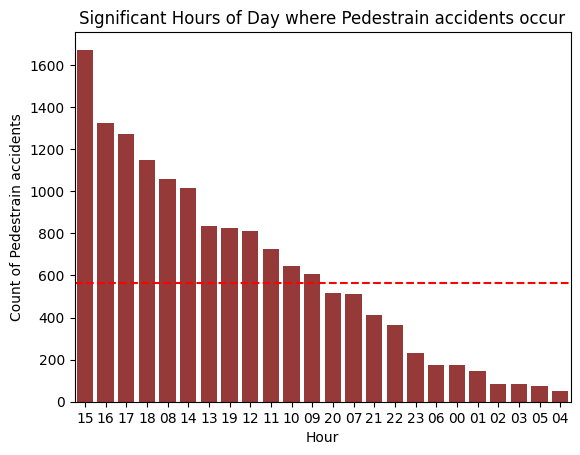

In [54]:

# finding median count of accidents 
median_count = ped_acc_hour['Count of Pedestrain accidents'].median()

# Define the color you want for the bars
bar_color = 'brown'  

# Create the bar plot with the specified color
sns.barplot(data=ped_acc_hour, x='Hour', y='Count of Pedestrain accidents', color=bar_color)
plt.title('Significant Hours of Day where Pedestrain accidents occur')

# Add a line for the median count
plt.axhline(y=median_count, color='red', linestyle='dashed', label='Median Count')

# Save the plot as a PNG image
plt.savefig('Significant Hours of Day where Pedestrain accidents occur.png', bbox_inches='tight')

# Show the plot
plt.show()


### O. For pedestrians involved in accidents, are there significant days of the week, on which they are more likely to be involved

In [55]:
# Executing the SQL query
cur.execute("""
    SELECT
        CASE day_of_week
            WHEN 1 THEN 'Sunday'
            WHEN 2 THEN 'Monday'
            WHEN 3 THEN 'Tuesday'
            WHEN 4 THEN 'Wednesday'
            WHEN 5 THEN 'Thursday'
            WHEN 6 THEN 'Friday'
            WHEN 7 THEN 'Saturday'
        END AS DayOfWeek,
        COUNT(*) AS Accident_Count
    FROM accident AS a
    JOIN casualty AS c ON a.accident_index = c.accident_index
    WHERE a.accident_year = 2020
        AND c.casualty_class = 3 -- Pedestrian
    GROUP BY day_of_week
    ORDER BY Accident_Count DESC;

""")

# Fetching the result of the query and storing it in a pandas DataFrame
results = cur.fetchall()
ped_acc_days = pd.DataFrame(results, columns = ['Days', 'Count of Pedestrain accidents'])
# Printing the DataFrame
ped_acc_days

,Days,Count of Pedestrain accidents
0,Friday,2543
1,Thursday,2366
2,Tuesday,2267
3,Wednesday,2247
4,Monday,2207
5,Saturday,1878
6,Sunday,1242


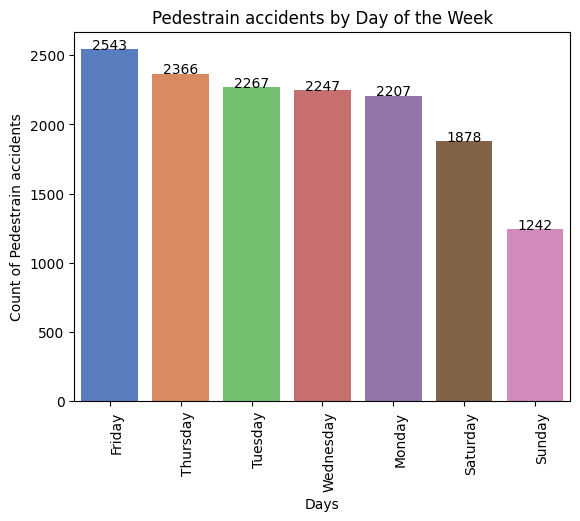

In [56]:
# Create stacked bar chart of occupation classification by gender and religion
occupation_chart = sns.barplot(data=ped_acc_days, x='Days', y='Count of Pedestrain accidents', palette='muted')
plt.xticks(rotation=90, ha='left')
plt.title('Pedestrain accidents by Day of the Week')

# Get the counts for each category and sort in the order of the countplot
counts = ped_acc_days['Count of Pedestrain accidents'].tolist()

# Add annotations to the plot using the sorted counts dataframe
for i, count in enumerate(counts):
    plt.text(i, count+1, str(count), ha='center')

# Save the plot as a PNG image
plt.savefig('Pedestrain_Accidents_by_Day_of_the_Week.png', bbox_inches='tight')

## 2. Outlier Detection 

In [57]:
acc_veh = pd.merge(vec_df, acc_df, how = 'inner', on = 'accident_index')
merged_data = pd.merge(cas_df, acc_veh, how = 'inner', on = 'accident_index')
merged_data

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,...,9,1,9,9,0,0,1,3,2,E01004576
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,...,4,1,1,1,0,0,1,1,2,E01003034
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,...,0,4,1,2,0,0,1,1,2,E01004726
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,...,4,4,1,1,0,0,1,1,2,E01003617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220430,600329,2020991030297,2020,991030297,2,1,1,1,38,7,...,0,1,1,1,0,0,2,1,-1,-1
220431,600329,2020991030297,2020,991030297,2,1,1,1,38,7,...,0,1,1,1,0,0,2,1,-1,-1
220432,600330,2020991030900,2020,991030900,2,1,1,1,76,11,...,0,1,1,1,0,0,1,2,-1,-1
220433,600330,2020991030900,2020,991030900,2,1,1,1,76,11,...,0,1,1,1,0,0,1,2,-1,-1


In [58]:
merged_data = merged_data.merge(lsoa_df, left_on='lsoa_of_accident_location', right_on='lsoa01cd')
merged_data

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,...,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,...,3,2,E01004576,4576,E01004576,Wandsworth 013D,Wandsworth 013D,4.456251e+05,4486.701130,c7ddebfb-d730-4be6-b67e-938adb21309e
1,489444,2020010240428,2020,010240428,2,1,1,1,39,7,...,1,2,E01004576,4576,E01004576,Wandsworth 013D,Wandsworth 013D,4.456251e+05,4486.701130,c7ddebfb-d730-4be6-b67e-938adb21309e
2,489444,2020010240428,2020,010240428,2,1,1,1,39,7,...,1,2,E01004576,4576,E01004576,Wandsworth 013D,Wandsworth 013D,4.456251e+05,4486.701130,c7ddebfb-d730-4be6-b67e-938adb21309e
3,492953,2020010249713,2020,010249713,1,1,1,2,31,6,...,3,2,E01004576,4576,E01004576,Wandsworth 013D,Wandsworth 013D,4.456251e+05,4486.701130,c7ddebfb-d730-4be6-b67e-938adb21309e
4,492953,2020010249713,2020,010249713,1,1,1,2,31,6,...,3,2,E01004576,4576,E01004576,Wandsworth 013D,Wandsworth 013D,4.456251e+05,4486.701130,c7ddebfb-d730-4be6-b67e-938adb21309e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,595323,202063D085620,2020,63D085620,1,2,2,2,68,10,...,1,-1,W01000466,32948,W01000466,Powys 010C,Powys 010C,1.747211e+06,7827.411516,f029128c-ebb5-44ba-ab93-7ddd81d59d04
201939,595324,202063D085620,2020,63D085620,1,3,2,1,42,7,...,1,-1,W01000466,32948,W01000466,Powys 010C,Powys 010C,1.747211e+06,7827.411516,f029128c-ebb5-44ba-ab93-7ddd81d59d04
201940,595324,202063D085620,2020,63D085620,1,3,2,1,42,7,...,1,-1,W01000466,32948,W01000466,Powys 010C,Powys 010C,1.747211e+06,7827.411516,f029128c-ebb5-44ba-ab93-7ddd81d59d04
201941,595327,202063D086520,2020,63D086520,2,1,1,2,51,8,...,2,-1,W01000481,32963,W01000481,Powys 008B,Powys 008B,7.044616e+06,13558.849188,2ef1558e-c2e5-44f8-8578-2f27b9d3fcdc


In [59]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201943 entries, 0 to 201942
Data columns (total 88 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   casualty_index                               201943 non-null  int64  
 1   accident_index                               201943 non-null  object 
 2   accident_year                                201943 non-null  int64  
 3   accident_reference                           201943 non-null  object 
 4   vehicle_reference_x                          201943 non-null  int64  
 5   casualty_reference                           201943 non-null  int64  
 6   casualty_class                               201943 non-null  int64  
 7   sex_of_casualty                              201943 non-null  int64  
 8   age_of_casualty                              201943 non-null  int64  
 9   age_band_of_casualty                         201943 non-nul

In [60]:
# select only numeric columns from DataFrame
comb_df = merged_data.select_dtypes(include=[int, float])
comb_df

,casualty_index,accident_year,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,objectid,shape__area,shape__length
0,484748,2020,1,1,3,1,31,6,3,9,...,9,9,0,0,1,3,2,4576,4.456251e+05,4486.701130
1,489444,2020,2,1,1,1,39,7,2,0,...,1,2,0,0,1,1,2,4576,4.456251e+05,4486.701130
2,489444,2020,2,1,1,1,39,7,2,0,...,1,2,0,0,1,1,2,4576,4.456251e+05,4486.701130
3,492953,2020,1,1,1,2,31,6,3,0,...,1,1,0,0,1,3,2,4576,4.456251e+05,4486.701130
4,492953,2020,1,1,1,2,31,6,3,0,...,1,1,0,0,1,3,2,4576,4.456251e+05,4486.701130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,595323,2020,1,2,2,2,68,10,3,0,...,2,2,0,0,2,1,-1,32948,1.747211e+06,7827.411516
201939,595324,2020,1,3,2,1,42,7,2,0,...,2,2,0,0,2,1,-1,32948,1.747211e+06,7827.411516
201940,595324,2020,1,3,2,1,42,7,2,0,...,2,2,0,0,2,1,-1,32948,1.747211e+06,7827.411516
201941,595327,2020,2,1,1,2,51,8,2,0,...,2,2,0,0,1,2,-1,32963,7.044616e+06,13558.849188


### Checking for Outliers

#### A. Z-scores

In [61]:
from scipy.stats import zscore

# Assuming 'comb_df' is your DataFrame
numeric_columns = comb_df.select_dtypes(include=[np.number])
z_scores = zscore(numeric_columns)

# Create a new DataFrame with the z-scores
new_comb_df = pd.DataFrame(z_scores, columns=numeric_columns.columns, index=numeric_columns.index)

# Filter rows where any of the z-scores exceeds a certain threshold
outliers_zscore = comb_df[(new_comb_df.abs() > 3).any(axis=1)]
outliers_zscore

,casualty_index,accident_year,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,objectid,shape__area,shape__length
0,484748,2020,1,1,3,1,31,6,3,9,...,9,9,0,0,1,3,2,4576,4.456251e+05,4486.701130
3,492953,2020,1,1,1,2,31,6,3,0,...,1,1,0,0,1,3,2,4576,4.456251e+05,4486.701130
4,492953,2020,1,1,1,2,31,6,3,0,...,1,1,0,0,1,3,2,4576,4.456251e+05,4486.701130
5,495363,2020,1,1,1,1,33,6,3,0,...,1,1,4,9,1,3,2,4576,4.456251e+05,4486.701130
6,495363,2020,1,1,1,1,33,6,3,0,...,1,1,4,9,1,3,2,4576,4.456251e+05,4486.701130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,595323,2020,1,2,2,2,68,10,3,0,...,2,2,0,0,2,1,-1,32948,1.747211e+06,7827.411516
201939,595324,2020,1,3,2,1,42,7,2,0,...,2,2,0,0,2,1,-1,32948,1.747211e+06,7827.411516
201940,595324,2020,1,3,2,1,42,7,2,0,...,2,2,0,0,2,1,-1,32948,1.747211e+06,7827.411516
201941,595327,2020,2,1,1,2,51,8,2,0,...,2,2,0,0,1,2,-1,32963,7.044616e+06,13558.849188


In [62]:
outliers_zscore.describe().T

,count,mean,std,min,25%,50%,75%,max
casualty_index,76724.0,5.372361e+05,3.474554e+04,484748.000000,505429.500000,534295.500000,5.683185e+05,5.953390e+05
accident_year,76724.0,2.020000e+03,0.000000e+00,2020.000000,2020.000000,2020.000000,2.020000e+03,2.020000e+03
vehicle_reference_x,76724.0,1.529547e+00,5.152796e+00,1.000000,1.000000,1.000000,2.000000e+00,9.990000e+02
casualty_reference,76724.0,1.521727e+00,6.935101e+00,1.000000,1.000000,1.000000,2.000000e+00,9.920000e+02
casualty_class,76724.0,1.445219e+00,6.993339e-01,1.000000,1.000000,1.000000,2.000000e+00,3.000000e+00
...,...,...,...,...,...,...,...,...
did_police_officer_attend_scene_of_accident,76724.0,1.579988e+00,8.117854e-01,-1.000000,1.000000,1.000000,2.000000e+00,3.000000e+00
trunk_road_flag,76724.0,1.658334e+00,8.605850e-01,-1.000000,2.000000,2.000000,2.000000e+00,2.000000e+00
objectid,76724.0,1.548349e+04,1.109245e+04,1.000000,4208.000000,15273.000000,2.539500e+04,3.437600e+04
shape__area,76724.0,1.189041e+07,2.888773e+07,35212.101379,276731.801516,691607.701111,7.441086e+06,6.837464e+08


##### Z-score method for checking outliers retieved 76724 rows with 74 columns of data contaning outliers 

#### B. Local Outlier Factor (LOF)

In [63]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor

# Apply LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outliers_lof = comb_df[lof.fit_predict(comb_df) == -1]
outliers_lof

,casualty_index,accident_year,vehicle_reference_x,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,objectid,shape__area,shape__length
128,488780,2020,1,1,1,2,29,6,3,0,...,1,1,0,0,1,3,2,1667,2.028572e+06,8117.971162
129,488780,2020,1,1,1,2,29,6,3,0,...,1,1,0,0,1,3,2,1667,2.028572e+06,8117.971162
130,489286,2020,1,1,2,2,32,6,3,0,...,2,2,0,0,2,1,2,1667,2.028572e+06,8117.971162
131,489286,2020,1,1,2,2,32,6,3,0,...,2,2,0,0,2,1,2,1667,2.028572e+06,8117.971162
132,489931,2020,2,1,1,1,18,4,2,0,...,1,2,0,0,1,1,2,1667,2.028572e+06,8117.971162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201930,595311,2020,2,2,2,2,11,3,3,0,...,1,1,0,0,2,1,-1,32947,4.947259e+07,39111.026751
201931,595311,2020,2,2,2,2,11,3,3,0,...,1,1,0,0,2,1,-1,32947,4.947259e+07,39111.026751
201932,595312,2020,1,1,1,2,54,8,3,0,...,8,2,0,7,2,1,-1,32947,4.947259e+07,39111.026751
201933,595312,2020,1,1,1,2,54,8,3,0,...,8,2,0,7,2,1,-1,32947,4.947259e+07,39111.026751


##### LoF method for checking outliers retieved 20195 rows with 74 columns of data contaning outliers

### C. Finding outliers using isolation forest

In [64]:
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91199 non-null  float64
 4   location_northing_osgr                       91199 non-null  float64
 5   longitude                                    91199 non-null  float64
 6   latitude                                     91199 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [65]:
#dropping columns 
non_str_acc_df = acc_df.drop(columns = ['accident_index','accident_reference','date','time','local_authority_ons_district', 'local_authority_highway', 'lsoa_of_accident_location'], axis = 1)

In [66]:
non_str_acc_df

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
0,2020,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,3,...,9,9,1,9,9,0,0,1,3,2
1,2020,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,2,...,0,4,1,1,1,0,0,1,1,2
2,2020,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,4,...,0,0,4,1,2,0,0,1,1,2
3,2020,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,4,...,0,4,4,1,1,0,0,1,1,2
4,2020,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,4,...,0,0,4,1,1,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,4,...,0,0,1,1,1,0,0,1,1,-1
91195,2020,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,6,...,0,0,1,1,1,0,0,1,2,-1
91196,2020,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,4,...,0,0,1,1,1,0,0,2,1,-1
91197,2020,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,3,...,0,0,1,1,1,0,0,1,2,-1


In [67]:
non_str_acc_df.dropna()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
0,2020,521389.0,175144.0,-0.254001,51.462262,1,3,1,1,3,...,9,9,1,9,9,0,0,1,3,2
1,2020,529337.0,176237.0,-0.139253,51.470327,1,3,1,2,2,...,0,4,1,1,1,0,0,1,1,2
2,2020,526432.0,182761.0,-0.178719,51.529614,1,3,1,1,4,...,0,0,4,1,2,0,0,1,1,2
3,2020,538676.0,184371.0,-0.001683,51.541210,1,2,1,1,4,...,0,4,4,1,1,0,0,1,1,2
4,2020,529324.0,181286.0,-0.137592,51.515704,1,3,1,2,4,...,0,0,4,1,1,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,4,...,0,0,1,1,1,0,0,1,1,-1
91195,2020,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,6,...,0,0,1,1,1,0,0,1,2,-1
91196,2020,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,4,...,0,0,1,1,1,0,0,2,1,-1
91197,2020,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,3,...,0,0,1,1,1,0,0,1,2,-1


In [68]:
acc_df_coord = acc_df[['longitude','latitude']]
X = pd.DataFrame(acc_df_coord).to_numpy()

In [69]:
X1 = pd.DataFrame(non_str_acc_df).to_numpy()
X1

array([[ 2.02000e+03,  5.21389e+05,  1.75144e+05, ...,  1.00000e+00,
         3.00000e+00,  2.00000e+00],
       [ 2.02000e+03,  5.29337e+05,  1.76237e+05, ...,  1.00000e+00,
         1.00000e+00,  2.00000e+00],
       [ 2.02000e+03,  5.26432e+05,  1.82761e+05, ...,  1.00000e+00,
         1.00000e+00,  2.00000e+00],
       ...,
       [ 2.02000e+03,  3.83664e+05,  8.10646e+05, ...,  2.00000e+00,
         1.00000e+00, -1.00000e+00],
       [ 2.02000e+03,  2.77161e+05,  6.74852e+05, ...,  1.00000e+00,
         2.00000e+00, -1.00000e+00],
       [ 2.02000e+03,  2.40402e+05,  6.81950e+05, ...,  1.00000e+00,
         1.00000e+00, -1.00000e+00]])

In [70]:
from sklearn.ensemble import IsolationForest

In [71]:
iforest = IsolationForest(max_samples= 100, random_state= 0, contamination= 0.01)
iforest.fit(X)
if_scores = iforest.decision_function(X)
if_anomalies = iforest.predict(X)
if_anomalies = pd.Series(if_anomalies).replace([-1,1],[1,0])
if_anomalies = X[if_anomalies == 1]

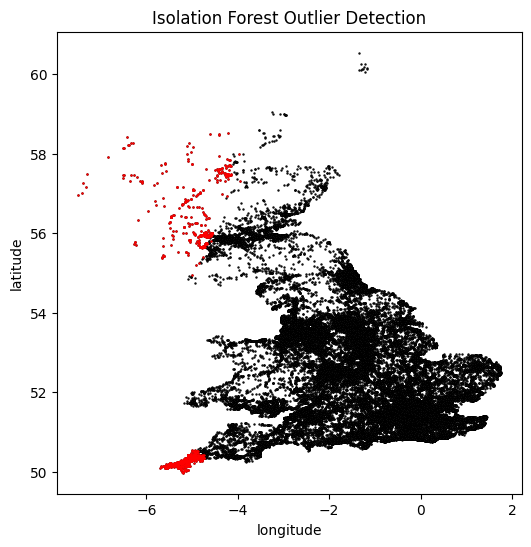

In [72]:
# plot the outliers in the accident dataframe

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c = 'white', edgecolor = 'k', s= 0.5)
plt.scatter(if_anomalies[:,0], if_anomalies[:,1], c= 'red', s= 0.5)

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Isolation Forest Outlier Detection')

# Save the plot as a PNG image
plt.savefig('Isolation Forest Outlier Detection.png', bbox_inches='tight')

### Dealing with Outliers

In [73]:
# Now that outliers have been found, we need to replace all with NaN values

comb_df.replace((-1,99,999), np.nan, inplace=True)
#comb_df.replace(99, np.nan, inplace=True)
#comb_df.replace(999, np.nan, inplace=True)

In [74]:
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201943 entries, 0 to 201942
Data columns (total 74 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   casualty_index                               201943 non-null  int64  
 1   accident_year                                201943 non-null  int64  
 2   vehicle_reference_x                          201941 non-null  float64
 3   casualty_reference                           201943 non-null  int64  
 4   casualty_class                               201943 non-null  int64  
 5   sex_of_casualty                              200610 non-null  float64
 6   age_of_casualty                              197477 non-null  float64
 7   age_band_of_casualty                         197480 non-null  float64
 8   casualty_severity                            201943 non-null  int64  
 9   pedestrian_location                          201942 non-nul

In [75]:

# Calculate the correlation between features and the target column
correlation_values = comb_df.corr()['accident_severity']

# Sort the correlation values in descending order to see the most positively and negatively correlated features
sorted_correlation = correlation_values.sort_values(ascending=False)

# Print the sorted correlation values
sorted_correlation[:59]


accident_severity                              1.000000
casualty_severity                              0.846385
did_police_officer_attend_scene_of_accident    0.159525
vehicle_left_hand_drive                        0.099059
sex_of_driver                                  0.083941
junction_location                              0.082402
second_road_class                              0.078010
pedestrian_crossing_physical_facilities        0.075941
first_point_of_impact                          0.073683
sex_of_casualty                                0.071654
skidding_and_overturning                       0.071125
pedestrian_crossing_human_control              0.070536
junction_detail                                0.062114
vehicle_direction_to                           0.051751
vehicle_direction_from                         0.049328
vehicle_leaving_carriageway                    0.038558
towing_and_articulation                        0.034805
special_conditions_at_site                     0

In [76]:
# Select columns to be cleaned

columns = ['accident_severity', 'number_of_vehicles', 'number_of_casualties', 'road_type', 'speed_limit','latitude',
           'light_conditions', 'weather_conditions', 'road_surface_conditions','casualty_severity','longitude',
          'vehicle_type', 'sex_of_driver', 'age_of_driver', 'engine_capacity_cc', 'age_of_vehicle',
          'casualty_class', 'sex_of_casualty', 'age_of_casualty', 'pedestrian_location']

# Create a duplicate DataFrame with specific columns
dup_comb_df = comb_df[columns].copy()

In [77]:
# Retrieve columns with NaN entries
columns_with_nan = dup_comb_df.columns[dup_comb_df.isna().any()]

# Print the columns with NaN entries
print(columns_with_nan)

Index(['speed_limit', 'light_conditions', 'weather_conditions',
       'road_surface_conditions', 'sex_of_driver', 'age_of_driver',
       'engine_capacity_cc', 'age_of_vehicle', 'sex_of_casualty',
       'age_of_casualty', 'pedestrian_location'],
      dtype='object')


In [78]:
# Group columns into two per their replacing value

col_median = ['speed_limit', 'engine_capacity_cc', 'age_of_casualty', 'sex_of_driver', 'age_of_driver', 'age_of_vehicle']
col_mode = ['sex_of_casualty', 'weather_conditions', 'pedestrian_location', 'light_conditions', 'road_surface_conditions']


In [79]:
# Function to replace nan values

def replace_nan_values(df, col_median, col_mode):
    # Replace missing values in columns using the median value
    for column in col_median:
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

    # Replace missing values in columns using the mode value
    for column in col_mode:
        mode_value = df[column].mode().iloc[0]
        df[column].fillna(mode_value, inplace=True)

    return df


In [80]:
# Apply the function to replace missing values in the DataFrame
modified_df = replace_nan_values(dup_comb_df, col_median, col_mode)

In [81]:
# check for nan values
modified_df.isnull().sum()

accident_severity          0
number_of_vehicles         0
number_of_casualties       0
road_type                  0
speed_limit                0
latitude                   0
light_conditions           0
weather_conditions         0
road_surface_conditions    0
casualty_severity          0
longitude                  0
vehicle_type               0
sex_of_driver              0
age_of_driver              0
engine_capacity_cc         0
age_of_vehicle             0
casualty_class             0
sex_of_casualty            0
age_of_casualty            0
pedestrian_location        0
dtype: int64

In [82]:
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201943 entries, 0 to 201942
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   accident_severity        201943 non-null  int64  
 1   number_of_vehicles       201943 non-null  int64  
 2   number_of_casualties     201943 non-null  int64  
 3   road_type                201943 non-null  int64  
 4   speed_limit              201943 non-null  float64
 5   latitude                 201943 non-null  float64
 6   light_conditions         201943 non-null  float64
 7   weather_conditions       201943 non-null  float64
 8   road_surface_conditions  201943 non-null  float64
 9   casualty_severity        201943 non-null  int64  
 10  longitude                201943 non-null  float64
 11  vehicle_type             201943 non-null  int64  
 12  sex_of_driver            201943 non-null  float64
 13  age_of_driver            201943 non-null  float64
 14  engi

#### correcting ages less than 16yrs for age of driver column

In [83]:

abc = modified_df[modified_df['age_of_driver'] < 17]
abc

,accident_severity,number_of_vehicles,number_of_casualties,road_type,speed_limit,latitude,light_conditions,weather_conditions,road_surface_conditions,casualty_severity,longitude,vehicle_type,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle,casualty_class,sex_of_casualty,age_of_casualty,pedestrian_location
313,3,2,1,1,30.0,51.592241,1.0,1.0,1.0,3,0.221030,1,1.0,15.0,1598.0,7.0,1,1.0,15.0,0.0
932,3,2,1,6,30.0,51.487581,1.0,1.0,1.0,3,-0.095425,1,1.0,15.0,1598.0,7.0,1,1.0,15.0,0.0
995,2,2,1,3,30.0,51.515470,4.0,1.0,1.0,2,0.076073,1,2.0,16.0,1598.0,7.0,1,2.0,16.0,0.0
1536,3,2,1,6,20.0,51.515593,4.0,2.0,1.0,3,-0.268292,2,1.0,16.0,49.0,10.0,1,1.0,16.0,0.0
1653,3,2,1,6,20.0,51.505208,4.0,1.0,1.0,3,-0.098278,2,1.0,16.0,48.0,11.0,1,1.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201139,3,2,1,6,60.0,51.738816,1.0,1.0,1.0,3,-4.973300,1,1.0,15.0,1598.0,7.0,1,1.0,15.0,0.0
201407,3,2,1,6,30.0,51.990646,1.0,9.0,1.0,3,-4.969711,1,2.0,8.0,1598.0,7.0,1,2.0,8.0,0.0
201420,3,2,1,6,30.0,51.693191,1.0,1.0,1.0,3,-4.952941,1,2.0,11.0,1598.0,7.0,1,2.0,11.0,0.0
201554,3,2,1,6,30.0,51.769109,1.0,1.0,1.0,3,-3.765407,1,1.0,15.0,1598.0,7.0,1,1.0,15.0,0.0


In [84]:
abc['age_of_driver'].value_counts()

16.0    721
15.0    409
14.0    351
13.0    299
12.0    238
11.0    187
10.0     92
9.0      65
8.0      45
7.0      44
6.0      37
5.0      21
4.0       8
3.0       2
Name: age_of_driver, dtype: int64

##### 2519 drivers have been inputed as drivng under the age of 17

In [85]:
# replace all ages below 17 with the median age

# Calculate the median age
median_age = modified_df['age_of_driver'].median()

# Replace ages below 17 with the median age
modified_df.loc[modified_df['age_of_driver'] < 17, 'age_of_driver'] = median_age


In [86]:
modified_df['age_of_driver'].unique()


array([ 32.,  30.,  39.,  31.,  38.,  33.,  57.,  55.,  45.,  25.,  20.,
        27.,  36.,  35.,  49.,  41.,  62.,  52.,  56.,  34.,  19.,  22.,
        44.,  42.,  23.,  47.,  53.,  28.,  50.,  29.,  18.,  58.,  24.,
        61.,  37.,  26.,  40.,  46.,  48.,  21.,  78.,  54.,  43.,  74.,
        65.,  51.,  63.,  17.,  87.,  60.,  69.,  59.,  77.,  66.,  64.,
        67.,  70.,  79.,  76.,  81.,  73.,  68.,  88.,  82.,  71.,  80.,
        72.,  85.,  93.,  84.,  91.,  83.,  86.,  75.,  90.,  89.,  97.,
        94.,  92.,  95.,  98., 100.,  96.])

## 3. Using the apriori algorithm, explore the impact of selected variables on accident severity.  

In [87]:
#!pip install mlxtend

In [88]:
modified_df

,accident_severity,number_of_vehicles,number_of_casualties,road_type,speed_limit,latitude,light_conditions,weather_conditions,road_surface_conditions,casualty_severity,longitude,vehicle_type,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle,casualty_class,sex_of_casualty,age_of_casualty,pedestrian_location
0,3,1,1,6,20.0,51.462262,1.0,9.0,9.0,3,-0.254001,9,2.0,32.0,1968.0,6.0,3,1.0,31.0,9.0
1,2,2,1,6,30.0,51.455133,1.0,1.0,2.0,2,-0.254734,9,2.0,30.0,1248.0,5.0,1,1.0,39.0,0.0
2,2,2,1,6,30.0,51.455133,1.0,1.0,2.0,2,-0.254734,1,1.0,39.0,1598.0,7.0,1,1.0,39.0,0.0
3,3,2,1,6,60.0,51.460148,1.0,1.0,1.0,3,-0.251563,1,2.0,31.0,1598.0,7.0,1,2.0,31.0,0.0
4,3,2,1,6,60.0,51.460148,1.0,1.0,1.0,3,-0.251563,9,3.0,38.0,1598.0,7.0,1,2.0,31.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,2,2,3,6,60.0,52.444677,6.0,2.0,2.0,3,-3.538477,21,1.0,64.0,10837.0,3.0,2,2.0,68.0,0.0
201939,2,2,3,6,60.0,52.444677,6.0,2.0,2.0,2,-3.538477,9,2.0,38.0,1685.0,5.0,2,1.0,42.0,0.0
201940,2,2,3,6,60.0,52.444677,6.0,2.0,2.0,2,-3.538477,21,1.0,64.0,10837.0,3.0,2,1.0,42.0,0.0
201941,2,2,1,6,30.0,52.517700,5.0,2.0,2.0,2,-3.313323,9,1.0,49.0,1956.0,4.0,1,2.0,51.0,0.0


In [89]:
modified_df.columns

Index(['accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'road_type', 'speed_limit', 'latitude', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'casualty_severity',
       'longitude', 'vehicle_type', 'sex_of_driver', 'age_of_driver',
       'engine_capacity_cc', 'age_of_vehicle', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'pedestrian_location'],
      dtype='object')

In [90]:
data = modified_df.drop(['casualty_severity', 'number_of_vehicles', 'latitude', 'longitude', 
    'age_of_driver',  'age_of_vehicle', 'number_of_casualties', 'sex_of_casualty', 'engine_capacity_cc', 'age_of_casualty' ], axis = 1)

In [91]:
# apply a function to perform one hot encoding on all columns

def one_hot_encoding(df, columns):
    encoded_dfs = []
    
    for col in columns:
        encoded_col = pd.get_dummies(df[col], prefix=col)
        encoded_dfs.append(encoded_col)
    
    return pd.concat([df] + encoded_dfs, axis=1)




# List of columns to apply one-hot encoding
columns_to_encode = ['accident_severity','road_type', 'speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type','sex_of_driver',
        'casualty_class', 'pedestrian_location']

# Apply one-hot encoding to specified columns
encoded_df = one_hot_encoding(data, columns_to_encode)

# Display the encoded DataFrame
encoded_df


,accident_severity,road_type,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,sex_of_driver,casualty_class,pedestrian_location,...,pedestrian_location_1.0,pedestrian_location_2.0,pedestrian_location_3.0,pedestrian_location_4.0,pedestrian_location_5.0,pedestrian_location_6.0,pedestrian_location_7.0,pedestrian_location_8.0,pedestrian_location_9.0,pedestrian_location_10.0
0,3,6,20.0,1.0,9.0,9.0,9,2.0,3,9.0,...,0,0,0,0,0,0,0,0,1,0
1,2,6,30.0,1.0,1.0,2.0,9,2.0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,30.0,1.0,1.0,2.0,1,1.0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,6,60.0,1.0,1.0,1.0,1,2.0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
4,3,6,60.0,1.0,1.0,1.0,9,3.0,1,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,2,6,60.0,6.0,2.0,2.0,21,1.0,2,0.0,...,0,0,0,0,0,0,0,0,0,0
201939,2,6,60.0,6.0,2.0,2.0,9,2.0,2,0.0,...,0,0,0,0,0,0,0,0,0,0
201940,2,6,60.0,6.0,2.0,2.0,21,1.0,2,0.0,...,0,0,0,0,0,0,0,0,0,0
201941,2,6,30.0,5.0,2.0,2.0,9,1.0,1,0.0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
encoded_df = encoded_df.drop(['accident_severity','road_type', 'speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type','sex_of_driver',
        'casualty_class', 'pedestrian_location'], axis = 1)
encoded_df

,accident_severity_1,accident_severity_2,accident_severity_3,road_type_1,road_type_2,road_type_3,road_type_6,road_type_7,road_type_9,speed_limit_20.0,...,pedestrian_location_1.0,pedestrian_location_2.0,pedestrian_location_3.0,pedestrian_location_4.0,pedestrian_location_5.0,pedestrian_location_6.0,pedestrian_location_7.0,pedestrian_location_8.0,pedestrian_location_9.0,pedestrian_location_10.0
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201939,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201940,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201941,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201943 entries, 0 to 201942
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   accident_severity_1          201943 non-null  uint8
 1   accident_severity_2          201943 non-null  uint8
 2   accident_severity_3          201943 non-null  uint8
 3   road_type_1                  201943 non-null  uint8
 4   road_type_2                  201943 non-null  uint8
 5   road_type_3                  201943 non-null  uint8
 6   road_type_6                  201943 non-null  uint8
 7   road_type_7                  201943 non-null  uint8
 8   road_type_9                  201943 non-null  uint8
 9   speed_limit_20.0             201943 non-null  uint8
 10  speed_limit_30.0             201943 non-null  uint8
 11  speed_limit_40.0             201943 non-null  uint8
 12  speed_limit_50.0             201943 non-null  uint8
 13  speed_limit_60.0             

#### Running Apriori on Accident table

In [94]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [95]:
# Frequent items (accident_severity and others)
freq_items_sets = apriori(encoded_df, min_support=0.2, use_colnames=True)
freq_items_sets

C:\Users\ekdzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.782676,(accident_severity_3)
1,0.721213,(road_type_6)
2,0.543762,(speed_limit_30.0)
3,0.711859,(light_conditions_1.0)
4,0.205816,(light_conditions_4.0)
...,...,...
548,0.211381,"(road_surface_conditions_1.0, casualty_class_1..."
549,0.249437,"(road_surface_conditions_1.0, casualty_class_1..."
550,0.244653,"(sex_of_driver_1.0, road_surface_conditions_1...."
551,0.219374,"(road_surface_conditions_1.0, casualty_class_1..."


### Getting the association rules 

In [96]:
rules = association_rules(freq_items_sets, metric = 'confidence', min_threshold = 0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(road_type_6),(accident_severity_3),0.721213,0.782676,0.553592,0.767584,0.980717,-0.010885,0.935063,-0.065881
1,(accident_severity_3),(road_type_6),0.782676,0.721213,0.553592,0.707306,0.980717,-0.010885,0.952486,-0.082967
2,(speed_limit_30.0),(accident_severity_3),0.543762,0.782676,0.441877,0.812629,1.038270,0.016287,1.159859,0.080790
3,(light_conditions_1.0),(accident_severity_3),0.711859,0.782676,0.563253,0.791242,1.010944,0.006098,1.041032,0.037571
4,(accident_severity_3),(light_conditions_1.0),0.782676,0.711859,0.563253,0.719650,1.010944,0.006098,1.027789,0.049814
...,...,...,...,...,...,...,...,...,...,...
2398,"(casualty_class_1, pedestrian_location_0.0, ve...","(road_surface_conditions_1.0, weather_conditio...",0.291587,0.649520,0.204711,0.702058,1.080888,0.015320,1.176338,0.105637
2399,"(casualty_class_1, road_surface_conditions_1.0...","(pedestrian_location_0.0, weather_conditions_1...",0.279277,0.545644,0.204711,0.733005,1.343375,0.052325,1.701738,0.354653
2400,"(casualty_class_1, road_surface_conditions_1.0...","(pedestrian_location_0.0, weather_conditions_1...",0.263891,0.571156,0.204711,0.775741,1.358194,0.053988,1.912268,0.358273
2401,"(casualty_class_1, vehicle_type_9, weather_con...","(pedestrian_location_0.0, road_surface_conditi...",0.289834,0.506930,0.204711,0.706304,1.393297,0.057785,1.678847,0.397482


In [97]:
# filtering df for accident severity strings
filtered_rules = rules[rules['consequents'].apply(lambda x: 'accident_severity' in str(x))]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(road_type_6),(accident_severity_3),0.721213,0.782676,0.553592,0.767584,0.980717,-0.010885,0.935063,-0.065881
2,(speed_limit_30.0),(accident_severity_3),0.543762,0.782676,0.441877,0.812629,1.038270,0.016287,1.159859,0.080790
3,(light_conditions_1.0),(accident_severity_3),0.711859,0.782676,0.563253,0.791242,1.010944,0.006098,1.041032,0.037571
5,(weather_conditions_1.0),(accident_severity_3),0.781671,0.782676,0.608701,0.778718,0.994943,-0.003094,0.982113,-0.022751
7,(road_surface_conditions_1.0),(accident_severity_3),0.692086,0.782676,0.542024,0.783174,1.000636,0.000345,1.002297,0.002065
...,...,...,...,...,...,...,...,...,...,...
2390,"(road_surface_conditions_1.0, casualty_class_1...","(pedestrian_location_0.0, accident_severity_3)",0.249437,0.733464,0.204711,0.820694,1.118928,0.021758,1.486485,0.141611
2392,"(road_surface_conditions_1.0, casualty_class_1...","(weather_conditions_1.0, accident_severity_3)",0.263891,0.608701,0.204711,0.775741,1.274419,0.044080,1.744849,0.292523
2396,"(casualty_class_1, light_conditions_1.0, pedes...","(road_surface_conditions_1.0, accident_severit...",0.289834,0.542024,0.204711,0.706304,1.303086,0.047614,1.559356,0.327517
2400,"(casualty_class_1, road_surface_conditions_1.0...","(pedestrian_location_0.0, weather_conditions_1...",0.263891,0.571156,0.204711,0.775741,1.358194,0.053988,1.912268,0.358273


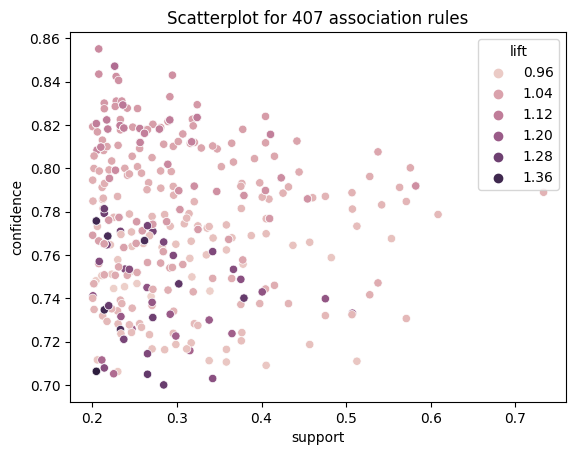

In [98]:
# plotting association rules using scatterplot

sns.scatterplot(data = filtered_rules, x = 'support', y = 'confidence', hue = 'lift')

# specify chart title
plt.title('Scatterplot for 407 association rules')

# Save the plot as a PNG image
plt.savefig('Scatterplot for 407 rules.png', bbox_inches='tight')

# Show the plot
plt.show()

In [99]:
filtered_rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'zhangs_metric'],
      dtype='object')

In [100]:
# Sort association table by support

sorted_rules = filtered_rules.sort_values(by='support', ascending=False)
rules1 = sorted_rules[:20]
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15,(pedestrian_location_0.0),(accident_severity_3),0.929629,0.782676,0.733464,0.788986,1.008062,0.005866,1.029904,0.113651
5,(weather_conditions_1.0),(accident_severity_3),0.781671,0.782676,0.608701,0.778718,0.994943,-0.003094,0.982113,-0.022751
172,(casualty_class_1),"(pedestrian_location_0.0, accident_severity_3)",0.735336,0.733464,0.582313,0.791900,1.079671,0.042970,1.280806,0.278813
13,(casualty_class_1),(accident_severity_3),0.735336,0.782676,0.582313,0.791900,1.011785,0.006783,1.044324,0.044009
169,"(casualty_class_1, pedestrian_location_0.0)",(accident_severity_3),0.735336,0.782676,0.582313,0.791900,1.011785,0.006783,1.044324,0.044009
9,(vehicle_type_9),(accident_severity_3),0.719668,0.782676,0.575925,0.800264,1.022472,0.012657,1.088056,0.078399
140,(weather_conditions_1.0),"(pedestrian_location_0.0, accident_severity_3)",0.781671,0.733464,0.571156,0.730686,0.996212,-0.002172,0.989684,-0.017117
137,"(pedestrian_location_0.0, weather_conditions_1.0)",(accident_severity_3),0.727849,0.782676,0.571156,0.784718,1.002609,0.001486,1.009484,0.009561
3,(light_conditions_1.0),(accident_severity_3),0.711859,0.782676,0.563253,0.791242,1.010944,0.006098,1.041032,0.037571
0,(road_type_6),(accident_severity_3),0.721213,0.782676,0.553592,0.767584,0.980717,-0.010885,0.935063,-0.065881


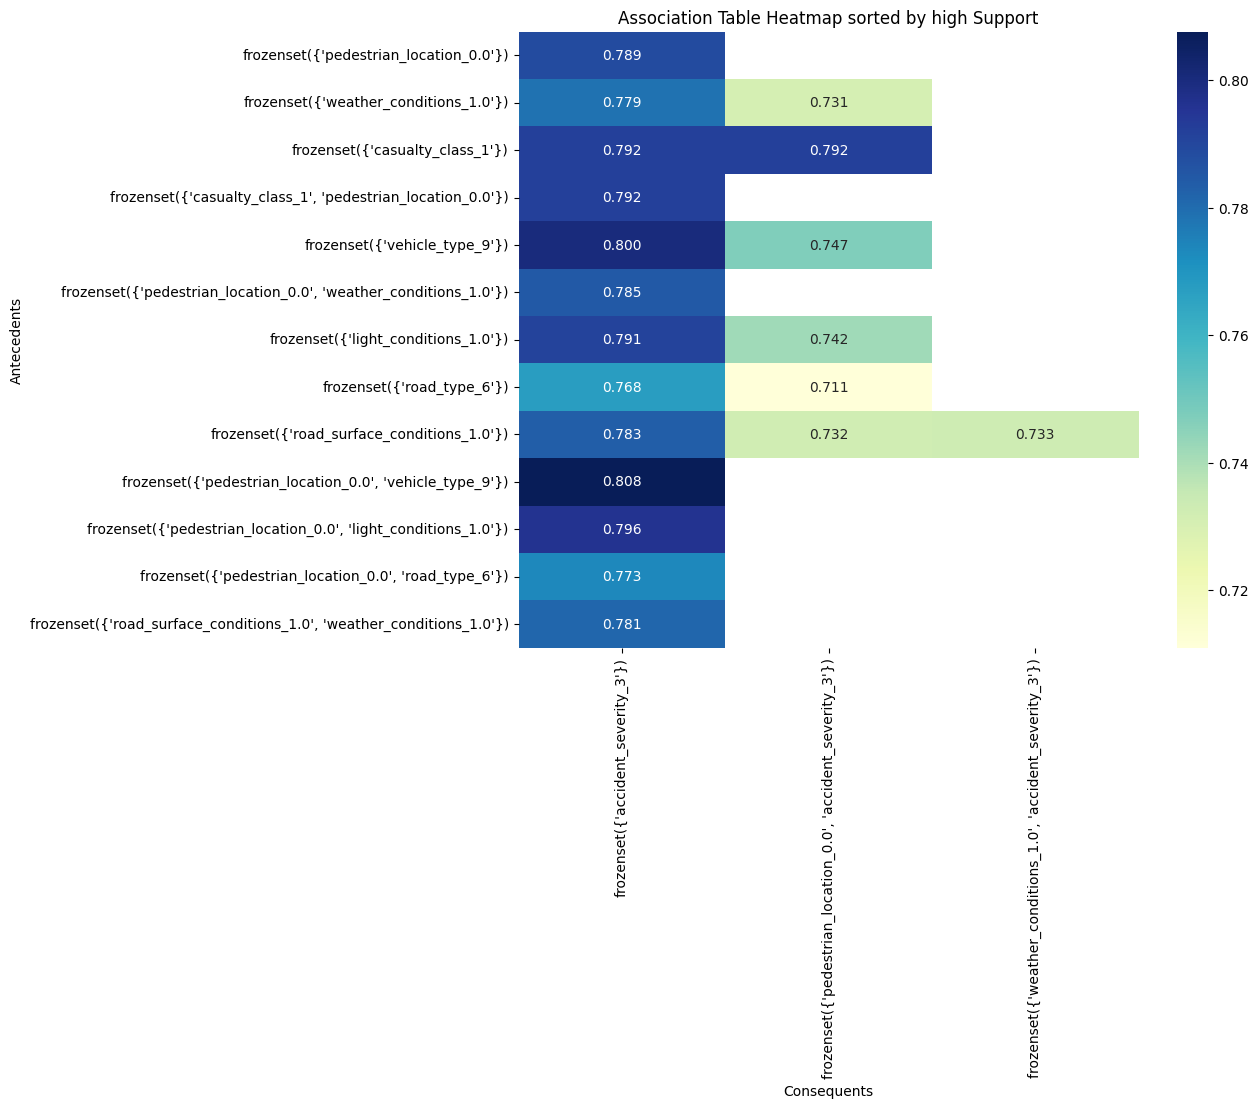

In [101]:

# Pivot the table to get antecedents as rows, consequents as columns, and the metric as values
pivot_table = rules1.pivot(index='antecedents', columns='consequents', values='confidence')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.3f', cbar=True)

# Customize the plot (optional)
plt.title('Association Table Heatmap sorted by high Support')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')

# Save the plot as a PNG image
plt.savefig('Association Table Heatmap sorted by high Support.png', bbox_inches='tight')

# Show the plot
plt.show()


In [102]:
# Sort association table by Confidence

sorted_rules = filtered_rules.sort_values(by='confidence', ascending=False)
rules2 = sorted_rules[:20]
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1300,"(pedestrian_location_0.0, speed_limit_30.0, ve...",(accident_severity_3),0.242722,0.782676,0.207568,0.855170,1.092623,0.017596,1.500541,0.111941
517,"(casualty_class_1, speed_limit_30.0, vehicle_t...",(accident_severity_3),0.267234,0.782676,0.226401,0.847200,1.082440,0.017243,1.422276,0.103937
1357,"(casualty_class_1, speed_limit_30.0, vehicle_t...","(pedestrian_location_0.0, accident_severity_3)",0.267234,0.733464,0.226401,0.847200,1.155066,0.030394,1.744344,0.183208
1354,"(casualty_class_1, speed_limit_30.0, vehicle_t...",(accident_severity_3),0.267234,0.782676,0.226401,0.847200,1.082440,0.017243,1.422276,0.103937
1342,"(pedestrian_location_0.0, road_surface_conditi...",(accident_severity_3),0.246168,0.782676,0.207653,0.843539,1.077762,0.014982,1.388994,0.095713
518,"(pedestrian_location_0.0, speed_limit_30.0, ve...",(accident_severity_3),0.349495,0.782676,0.294643,0.843053,1.077141,0.021101,1.384696,0.110094
480,"(speed_limit_30.0, vehicle_type_9, light_condi...",(accident_severity_3),0.270799,0.782676,0.228134,0.842446,1.076366,0.016186,1.379360,0.097295
1330,"(pedestrian_location_0.0, speed_limit_30.0, ve...",(accident_severity_3),0.274860,0.782676,0.231060,0.840648,1.074068,0.015934,1.363795,0.095100
486,"(pedestrian_location_0.0, speed_limit_30.0, li...",(accident_severity_3),0.350089,0.782676,0.291657,0.833093,1.064416,0.017650,1.302064,0.093116
1101,"(pedestrian_location_0.0, speed_limit_30.0, ro...",(accident_severity_3),0.282580,0.782676,0.234853,0.831105,1.061876,0.013685,1.286738,0.081222


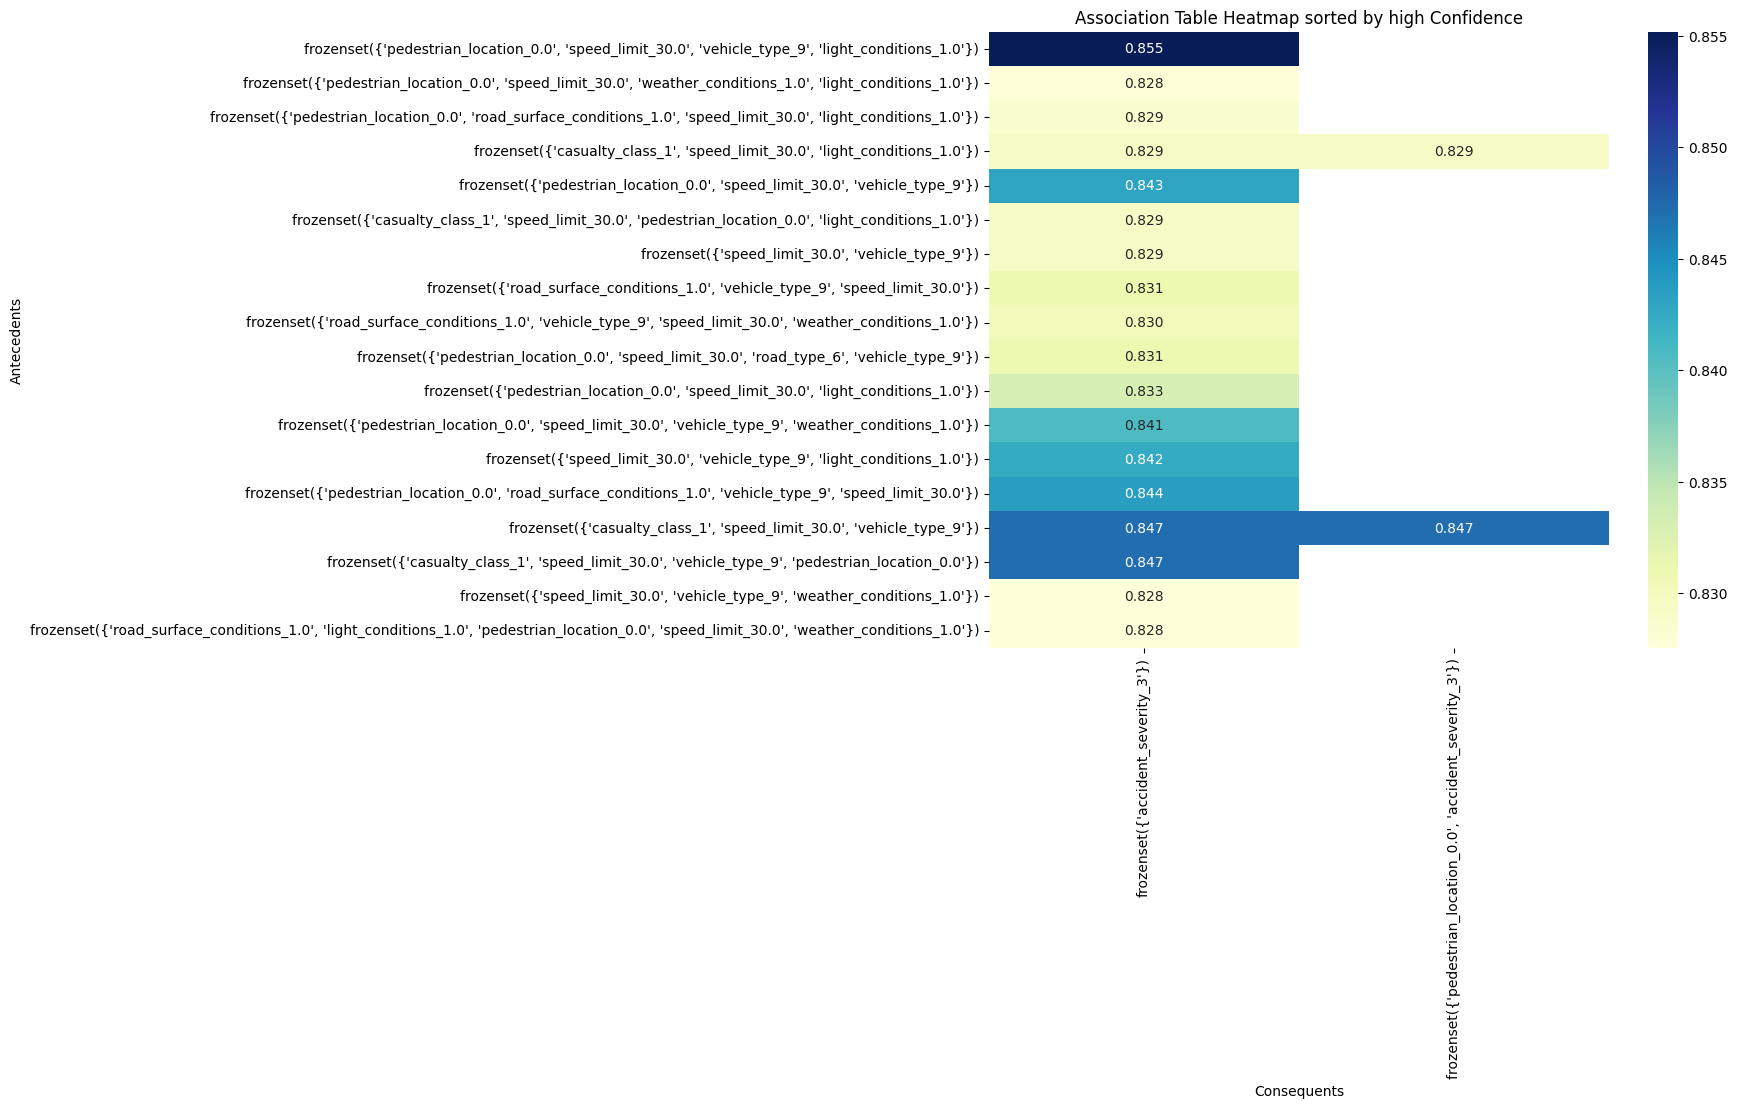

In [103]:

# Pivot the table to get antecedents as rows, consequents as columns, and the metric as values
pivot_table = rules2.pivot(index='antecedents', columns='consequents', values='confidence')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.3f', cbar=True)

# Customize the plot (optional)
plt.title('Association Table Heatmap sorted by high Confidence')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')

# Save the plot as a PNG image
plt.savefig('Association Table Heatmap sorted by high confidence.png', bbox_inches='tight')

# Show the plot
plt.show()


In [104]:
# Sort association table by Lift

sorted_rules = filtered_rules.sort_values(by='lift', ascending=False)
rules3 = sorted_rules[:20]
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2401,"(casualty_class_1, vehicle_type_9, weather_con...","(pedestrian_location_0.0, road_surface_conditi...",0.289834,0.506930,0.204711,0.706304,1.393297,0.057785,1.678847,0.397482
2400,"(casualty_class_1, road_surface_conditions_1.0...","(pedestrian_location_0.0, weather_conditions_1...",0.263891,0.571156,0.204711,0.775741,1.358194,0.053988,1.912268,0.358273
2092,"(pedestrian_location_0.0, speed_limit_30.0, we...","(road_surface_conditions_1.0, accident_severit...",0.291473,0.542024,0.214140,0.734680,1.355438,0.056154,1.726126,0.370107
2107,"(casualty_class_1, road_surface_conditions_1.0...","(pedestrian_location_0.0, weather_conditions_1...",0.283927,0.571156,0.218274,0.768771,1.345990,0.056108,1.854625,0.358975
2201,"(casualty_class_1, road_surface_conditions_1.0...","(pedestrian_location_0.0, weather_conditions_1...",0.341349,0.571156,0.261698,0.766657,1.342290,0.066734,1.837830,0.387162
1284,"(speed_limit_30.0, weather_conditions_1.0, lig...","(road_surface_conditions_1.0, accident_severit...",0.321442,0.542024,0.233229,0.725571,1.338632,0.059000,1.668832,0.372804
2160,"(casualty_class_1, road_surface_conditions_1.0...","(pedestrian_location_0.0, weather_conditions_1...",0.404718,0.571156,0.302199,0.746690,1.307331,0.071042,1.692962,0.394910
2115,"(casualty_class_1, vehicle_type_9, weather_con...","(road_surface_conditions_1.0, accident_severit...",0.289834,0.542024,0.204711,0.706304,1.303086,0.047614,1.559356,0.327517
2396,"(casualty_class_1, light_conditions_1.0, pedes...","(road_surface_conditions_1.0, accident_severit...",0.289834,0.542024,0.204711,0.706304,1.303086,0.047614,1.559356,0.327517
2128,"(pedestrian_location_0.0, vehicle_type_9, weat...","(road_surface_conditions_1.0, accident_severit...",0.376220,0.542024,0.265218,0.704956,1.300598,0.061298,1.552226,0.370520


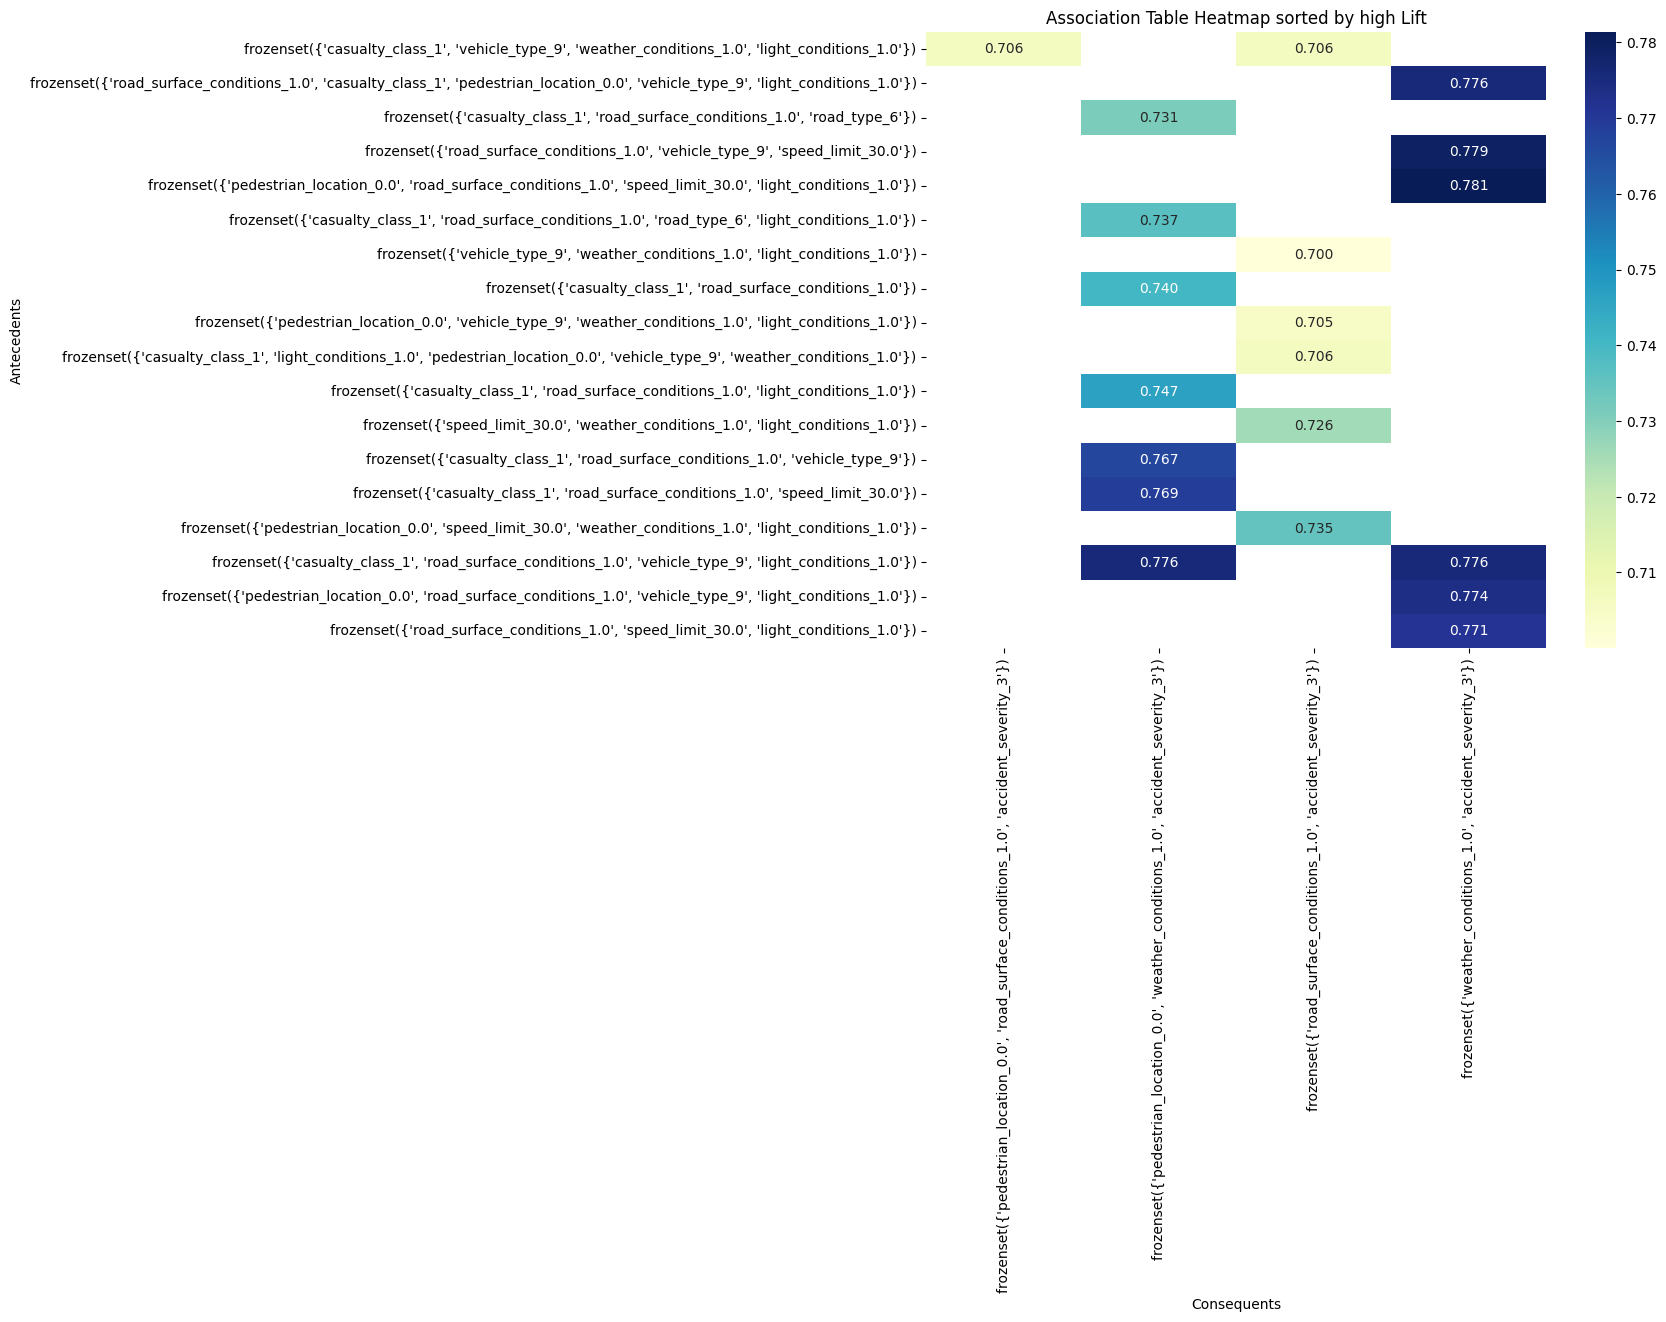

In [105]:

# Pivot the table to get antecedents as rows, consequents as columns, and the metric as values
pivot_table = rules3.pivot(index='antecedents', columns='consequents', values='confidence')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.3f', cbar=True)

# Customize the plot (optional)
plt.title('Association Table Heatmap sorted by high Lift')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
# Save the plot as a PNG image
plt.savefig('Association Table Heatmap sorted by high lift.png', bbox_inches='tight')

# Show the plot
plt.show()


### 4. Clustering of accidents  Humberside

In [106]:
# Merge the 'acc_df' and 'lsoa_df' DataFrames on the 'lsoa_of_accident_location' and 'lsoa01cd' columns
merged_df = pd.merge(acc_df, lsoa_df, left_on='lsoa_of_accident_location', right_on='lsoa01cd')

# Define the conditions for filtering
conditions = (
    merged_df['lsoa01nm'].str.contains('Kingston upon Hull') |
    merged_df['lsoa01nm'].str.contains('North Lincolnshire') |
    merged_df['lsoa01nm'].str.contains('North East Lincolnshire') |
    merged_df['lsoa01nm'].str.contains('East Riding of Yorkshire')
    
)

# Apply the filtering conditions and select all columns from both DataFrames
data = merged_df[conditions]

# Display the final result
data


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
35821,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,...,1,2,E01012777,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff
35822,2020160918418,2020,160918418,505576.0,428756.0,-0.400627,53.744520,16,3,2,...,1,2,E01012777,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff
35823,2020160936879,2020,160936879,505583.0,428752.0,-0.400523,53.744482,16,3,2,...,2,2,E01012777,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff
35824,2020160947046,2020,160947046,506031.0,428789.0,-0.393720,53.744724,16,3,1,...,1,2,E01012777,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff
35825,2020160951627,2020,160951627,505692.0,428758.0,-0.398868,53.744514,16,2,2,...,1,2,E01012777,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37479,2020161011040,2020,161011040,478094.0,403312.0,-0.823599,53.520707,16,3,2,...,1,2,E01013244,13244,E01013244,North Lincolnshire 020D,North Lincolnshire 020D,5.413456e+06,19987.975175,72c64631-5015-4fe6-a857-931f9433fd10
37480,2020161011144,2020,161011144,519036.0,428776.0,-0.196631,53.741804,16,3,2,...,1,2,E01013095,13095,E01013095,East Riding of Yorkshire 029B,East Riding of Yorkshire 029B,6.221249e+05,5606.223469,5e7ff52f-4524-4ca9-a49d-80b9e461b402
37481,2020161011936,2020,161011936,510941.0,432122.0,-0.318108,53.773648,16,3,2,...,2,2,E01012815,12815,E01012815,Kingston upon Hull 013D,Kingston upon Hull 013D,3.480635e+05,3647.233829,c4d959f1-51ae-4ade-a6fb-dbd860999c4f
37482,2020161012614,2020,161012614,504795.0,439763.0,-0.408728,53.843568,16,3,5,...,2,2,E01013037,13037,E01013037,East Riding of Yorkshire 019B,East Riding of Yorkshire 019B,2.577429e+06,11349.306536,e3117ff6-de67-45f4-8ccd-9608fbacd93e


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 35821 to 37483
Data columns (total 43 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               1663 non-null   object 
 1   accident_year                                1663 non-null   int64  
 2   accident_reference                           1663 non-null   object 
 3   location_easting_osgr                        1663 non-null   float64
 4   location_northing_osgr                       1663 non-null   float64
 5   longitude                                    1663 non-null   float64
 6   latitude                                     1663 non-null   float64
 7   police_force                                 1663 non-null   int64  
 8   accident_severity                            1663 non-null   int64  
 9   number_of_vehicles                           1663 non-null   int64  


In [108]:
data['city'] = data['lsoa01nm'].apply(lambda x: x[:-5].strip())  # Remove spaces using .strip()
humb_cities = ['Kingston upon Hull', 'East Riding of Yorkshire', 'North East Lincolnshire', 'North Lincolnshire']  # Removed spaces before city names
data = data[data['city'].isin(humb_cities)]


C:\Users\ekdzi\AppData\Local\Temp\ipykernel_21288\3953185256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city'] = data['lsoa01nm'].apply(lambda x: x[:-5].strip())  # Remove spaces using .strip()


In [109]:
data_coord = data[['longitude','latitude']]
data_coord.isnull().sum()

longitude    0
latitude     0
dtype: int64

In [110]:
data_coord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 35821 to 37483
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  1663 non-null   float64
 1   latitude   1663 non-null   float64
dtypes: float64(2)
memory usage: 39.0 KB


In [111]:
data_coord.isnull().sum()

longitude    0
latitude     0
dtype: int64

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 35821 to 37483
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               1663 non-null   object 
 1   accident_year                                1663 non-null   int64  
 2   accident_reference                           1663 non-null   object 
 3   location_easting_osgr                        1663 non-null   float64
 4   location_northing_osgr                       1663 non-null   float64
 5   longitude                                    1663 non-null   float64
 6   latitude                                     1663 non-null   float64
 7   police_force                                 1663 non-null   int64  
 8   accident_severity                            1663 non-null   int64  
 9   number_of_vehicles                           1663 non-null   int64  


### Pivot table analysis of the cities by accident factors

In [113]:
city_by_acc_severity = pd.pivot_table(data, index='city', columns='accident_severity', values='accident_index', aggfunc='count', fill_value=0)

city_by_acc_severity

accident_severity,1,2,3
city,,,
East Riding of Yorkshire,12,95,381
Kingston upon Hull,7,96,466
North East Lincolnshire,2,61,239
North Lincolnshire,11,65,228


In [114]:
city_by_road_type = pd.pivot_table(data, index='city', columns='road_type', values='accident_index', aggfunc='count', fill_value=0)

city_by_road_type

road_type,1,2,3,6,7,9
city,,,,,,
East Riding of Yorkshire,31,0,38,412,6,1
Kingston upon Hull,56,0,121,386,6,0
North East Lincolnshire,33,1,32,235,1,0
North Lincolnshire,20,0,50,230,4,0


In [115]:
city_by_speed_limit = pd.pivot_table(data, index='city', columns='speed_limit', values='accident_index', aggfunc='count', fill_value=0)

city_by_speed_limit

speed_limit,20,30,40,50,60,70
city,,,,,,
East Riding of Yorkshire,34,205,45,28,155,21
Kingston upon Hull,22,491,52,1,0,3
North East Lincolnshire,11,238,11,16,14,12
North Lincolnshire,3,154,30,17,69,31


In [116]:
city_by_rural_urban = pd.pivot_table(data, index='city', columns='urban_or_rural_area', values='accident_index', aggfunc='count', fill_value=0)

city_by_rural_urban

urban_or_rural_area,1,2
city,,
East Riding of Yorkshire,163,325
Kingston upon Hull,556,13
North East Lincolnshire,242,60
North Lincolnshire,127,177


In [117]:
city_by_light_conditions = pd.pivot_table(data, index='city', columns='light_conditions', values='accident_index', aggfunc='count', fill_value=0)

city_by_light_conditions

light_conditions,1,4,5,6,7
city,,,,,
East Riding of Yorkshire,354,69,3,60,2
Kingston upon Hull,401,159,5,1,3
North East Lincolnshire,208,79,5,10,0
North Lincolnshire,219,52,1,32,0


In [118]:
city_by_road_surface_conditions = pd.pivot_table(data, index='city', columns='road_surface_conditions', values='accident_index', aggfunc='count', fill_value=0)

city_by_road_surface_conditions

road_surface_conditions,-1,1,2,3,4
city,,,,,
East Riding of Yorkshire,0,352,130,0,6
Kingston upon Hull,0,433,133,1,2
North East Lincolnshire,0,236,65,1,0
North Lincolnshire,1,220,79,0,4


In [119]:
city_by_weather_conditions = pd.pivot_table(data, index='city', columns='weather_conditions', values='accident_index', aggfunc='count', fill_value=0)

city_by_weather_conditions

weather_conditions,1,2,3,4,5,7,8,9
city,,,,,,,,
East Riding of Yorkshire,417,42,0,15,5,2,6,1
Kingston upon Hull,484,47,1,9,7,3,15,3
North East Lincolnshire,254,25,0,10,1,2,8,2
North Lincolnshire,253,24,0,17,5,1,4,0


### Kmeans Clustering

In [120]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler

In [121]:
X1 = pd.DataFrame(data_coord).to_numpy()

In [122]:
X1

array([[-0.393424, 53.744936],
       [-0.400627, 53.74452 ],
       [-0.400523, 53.744482],
       ...,
       [-0.318108, 53.773648],
       [-0.408728, 53.843568],
       [-0.428826, 53.743858]])

In [123]:
data

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,trunk_road_flag,lsoa_of_accident_location,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid,city
35821,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,...,2,E01012777,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff,Kingston upon Hull
35822,2020160918418,2020,160918418,505576.0,428756.0,-0.400627,53.744520,16,3,2,...,2,E01012777,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff,Kingston upon Hull
35823,2020160936879,2020,160936879,505583.0,428752.0,-0.400523,53.744482,16,3,2,...,2,E01012777,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff,Kingston upon Hull
35824,2020160947046,2020,160947046,506031.0,428789.0,-0.393720,53.744724,16,3,1,...,2,E01012777,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff,Kingston upon Hull
35825,2020160951627,2020,160951627,505692.0,428758.0,-0.398868,53.744514,16,2,2,...,2,E01012777,12777,E01012777,Kingston upon Hull 028E,Kingston upon Hull 028E,3.567509e+05,3963.099631,4c068a55-c2d9-426c-9cfa-94742ef4a3ff,Kingston upon Hull
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37479,2020161011040,2020,161011040,478094.0,403312.0,-0.823599,53.520707,16,3,2,...,2,E01013244,13244,E01013244,North Lincolnshire 020D,North Lincolnshire 020D,5.413456e+06,19987.975175,72c64631-5015-4fe6-a857-931f9433fd10,North Lincolnshire
37480,2020161011144,2020,161011144,519036.0,428776.0,-0.196631,53.741804,16,3,2,...,2,E01013095,13095,E01013095,East Riding of Yorkshire 029B,East Riding of Yorkshire 029B,6.221249e+05,5606.223469,5e7ff52f-4524-4ca9-a49d-80b9e461b402,East Riding of Yorkshire
37481,2020161011936,2020,161011936,510941.0,432122.0,-0.318108,53.773648,16,3,2,...,2,E01012815,12815,E01012815,Kingston upon Hull 013D,Kingston upon Hull 013D,3.480635e+05,3647.233829,c4d959f1-51ae-4ade-a6fb-dbd860999c4f,Kingston upon Hull
37482,2020161012614,2020,161012614,504795.0,439763.0,-0.408728,53.843568,16,3,5,...,2,E01013037,13037,E01013037,East Riding of Yorkshire 019B,East Riding of Yorkshire 019B,2.577429e+06,11349.306536,e3117ff6-de67-45f4-8ccd-9608fbacd93e,East Riding of Yorkshire


C:\Users\ekdzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ekdzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ekdzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ekdzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

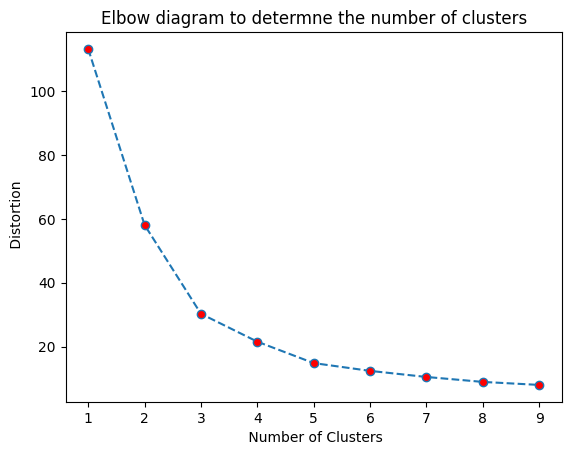

In [124]:
# find the number of K clusters needed.
import matplotlib.pyplot as plt
clust_no = []

for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X1)
    clust_no.append(kmeans.inertia_)
    
plt.figure()
plt.plot(range(1,10), clust_no, linestyle = 'dashed', marker = 'o', markerfacecolor = 'red')
plt.xlabel(' Number of Clusters')
plt.ylabel(' Distortion')
plt.title('Elbow diagram to determne the number of clusters')
plt.show()

In [125]:
#normalizing the data using standardscaler
scale = StandardScaler()
X_scale = scale.fit_transform(X1)

In [126]:
#initilizing kmeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans

KMeans(n_clusters=4, n_init=10, random_state=42)

In [127]:
labels = kmeans.fit_predict(X1)

In [128]:

data['cluster'] = kmeans.labels_
centroids = kmeans.cluster_centers_
centroids

array([[-0.35108188, 53.79457474],
       [-0.0940896 , 53.57618198],
       [-0.82557698, 53.80859422],
       [-0.64242918, 53.59040132]])

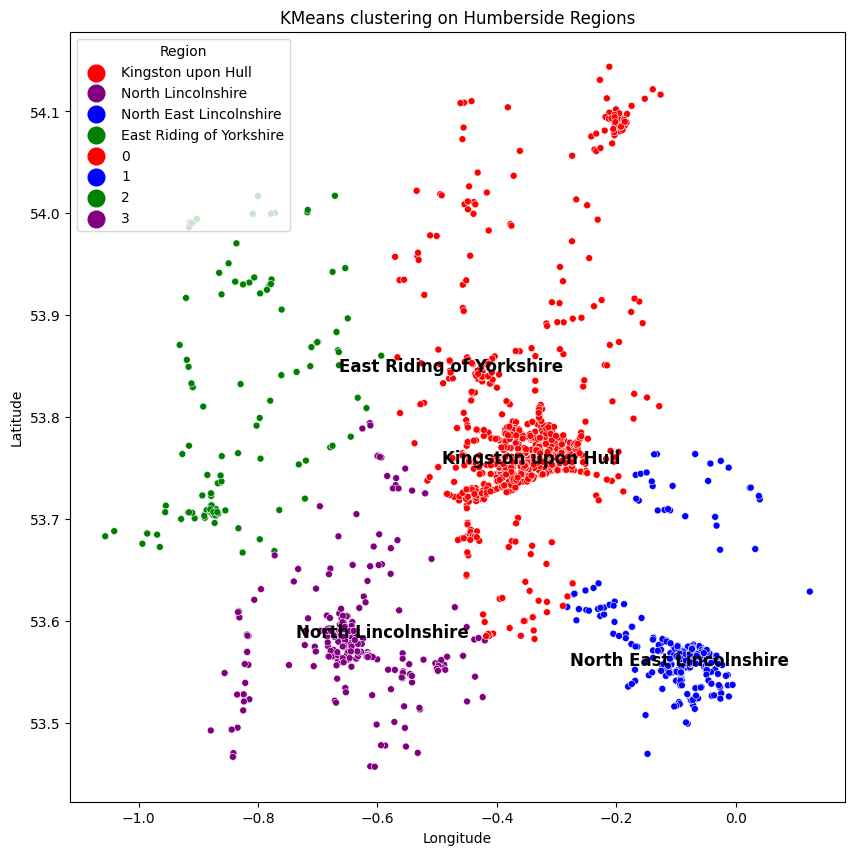

In [129]:
# Create a colour palette for differentiating regions
region_colours = {
    'Kingston upon Hull': 'red',
    'East Riding of Yorkshire': 'green',
    'North East Lincolnshire': 'blue',
    'North Lincolnshire': 'purple'
}
cluster_colours = {0: 'red', 1: 'blue',2: 'g', 3: 'purple'}

# Creating a scatter plot with different colours for each region with cluster names
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='city',
                palette=region_colours, alpha=0.7, s=20)
sns.scatterplot(data=data, x='longitude', y='latitude', hue='cluster',
                palette=cluster_colours, s=25)

# Add legend and labels
legend = plt.legend(title='Region', loc='upper left', markerscale=2)
legend.get_frame().set_alpha(0.8)  
plt.title('KMeans clustering on Humberside Regions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


# Add text labels for region names
for region, data in data.groupby('city'):
    # Calculate the centroid of the data points for each region
    centroid_longitude = data['longitude'].mean()
    centroid_latitude = data['latitude'].mean()
    plt.text(centroid_longitude, centroid_latitude, region, fontsize=12, ha='center', va='center',
             color='black', fontweight='bold')

# Save the plot as a PNG image
plt.savefig('KMeans clustering on Humberside Regions.png', bbox_inches='tight')
plt.show()

### 5. Developing a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents,

### Classification with unclean data

In [130]:
acc_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [131]:
acc_df = acc_df.dropna()

In [132]:
y_label = acc_df['accident_severity']==1
y_label

0        False
1        False
2        False
3        False
4        False
         ...  
91194    False
91195    False
91196    False
91197    False
91198    False
Name: accident_severity, Length: 91199, dtype: bool

In [133]:
y_label.value_counts()

False    89808
True      1391
Name: accident_severity, dtype: int64

In [134]:
from imblearn.under_sampling import RandomUnderSampler

In [135]:
df_acc_drop = acc_df
df_acc_drop

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [136]:
df_acc_balanced, y_balanced = RandomUnderSampler().fit_resample(df_acc_drop, y_label)
df_acc_balanced

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020302001450,2020,302001450,442101.0,340606.0,-1.374681,52.961196,30,3,2,...,0,1,9,1,0,0,2,1,2,E01019701
1,2020520101349,2020,520101349,332818.0,108843.0,-2.956219,50.875154,52,2,2,...,0,1,2,2,0,0,1,1,2,E01029170
2,2020040969108,2020,040969108,369520.0,427742.0,-2.463639,53.745170,4,2,2,...,0,1,1,1,0,0,1,1,2,E01012573
3,2020610025120,2020,610025120,330846.0,193744.0,-3.000685,51.638234,61,2,2,...,8,1,1,1,0,0,2,1,-1,W01001509
4,2020520101059,2020,520101059,331507.0,138307.0,-2.980422,51.139911,52,3,2,...,5,1,2,2,0,0,2,1,2,E01029090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,2020991006874,2020,991006874,254367.0,661245.0,-4.326142,55.822415,99,1,1,...,0,4,1,2,0,0,1,1,-1,-1
2778,2020991009077,2020,991009077,270790.0,659812.0,-4.063523,55.814225,99,1,2,...,0,6,1,2,0,0,1,1,-1,-1
2779,2020991010035,2020,991010035,113410.0,903322.0,-6.842655,57.926736,99,1,1,...,0,1,1,1,0,0,2,1,-1,-1
2780,2020991010115,2020,991010115,381609.0,654146.0,-2.294786,55.780278,99,1,2,...,0,1,1,2,0,0,2,1,-1,-1


In [137]:
y_balanced

0       False
1       False
2       False
3       False
4       False
        ...  
2777     True
2778     True
2779     True
2780     True
2781     True
Name: accident_severity, Length: 2782, dtype: bool

##### Feature selection using filtering

In [138]:
df_acc_balanced = df_acc_balanced.drop(['accident_severity','did_police_officer_attend_scene_of_accident'], axis = 1)

In [139]:
df_acc_balanced = df_acc_balanced.select_dtypes([np.number])
df_acc_balanced

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,...,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag
0,2020,442101.0,340606.0,-1.374681,52.961196,30,2,1,7,324,...,-1,0,0,1,9,1,0,0,2,2
1,2020,332818.0,108843.0,-2.956219,50.875154,52,2,1,6,-1,...,-1,0,0,1,2,2,0,0,1,2
2,2020,369520.0,427742.0,-2.463639,53.745170,4,2,1,1,70,...,0,0,0,1,1,1,0,0,1,2
3,2020,330846.0,193744.0,-3.000685,51.638234,61,2,1,1,734,...,4042,0,8,1,1,1,0,0,2,-1
4,2020,331507.0,138307.0,-2.980422,51.139911,52,2,1,3,607,...,0,0,5,1,2,2,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,2020,254367.0,661245.0,-4.326142,55.822415,99,1,1,2,926,...,-1,0,0,4,1,2,0,0,1,-1
2778,2020,270790.0,659812.0,-4.063523,55.814225,99,2,1,2,938,...,-1,0,0,6,1,2,0,0,1,-1
2779,2020,113410.0,903322.0,-6.842655,57.926736,99,1,1,5,941,...,-1,0,0,1,1,1,0,0,2,-1
2780,2020,381609.0,654146.0,-2.294786,55.780278,99,2,1,6,914,...,-1,0,0,1,1,2,0,0,2,-1


In [140]:
df_acc_balanced.isna().sum()

accident_year                              0
location_easting_osgr                      0
location_northing_osgr                     0
longitude                                  0
latitude                                   0
police_force                               0
number_of_vehicles                         0
number_of_casualties                       0
day_of_week                                0
local_authority_district                   0
first_road_class                           0
first_road_number                          0
road_type                                  0
speed_limit                                0
junction_detail                            0
junction_control                           0
second_road_class                          0
second_road_number                         0
pedestrian_crossing_human_control          0
pedestrian_crossing_physical_facilities    0
light_conditions                           0
weather_conditions                         0
road_surfa

In [141]:
y_balanced.isna().sum()

0

In [142]:
df_acc_balanced = df_acc_balanced.dropna()

In [143]:
df_acc_balanced

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,day_of_week,local_authority_district,...,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag
0,2020,442101.0,340606.0,-1.374681,52.961196,30,2,1,7,324,...,-1,0,0,1,9,1,0,0,2,2
1,2020,332818.0,108843.0,-2.956219,50.875154,52,2,1,6,-1,...,-1,0,0,1,2,2,0,0,1,2
2,2020,369520.0,427742.0,-2.463639,53.745170,4,2,1,1,70,...,0,0,0,1,1,1,0,0,1,2
3,2020,330846.0,193744.0,-3.000685,51.638234,61,2,1,1,734,...,4042,0,8,1,1,1,0,0,2,-1
4,2020,331507.0,138307.0,-2.980422,51.139911,52,2,1,3,607,...,0,0,5,1,2,2,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,2020,254367.0,661245.0,-4.326142,55.822415,99,1,1,2,926,...,-1,0,0,4,1,2,0,0,1,-1
2778,2020,270790.0,659812.0,-4.063523,55.814225,99,2,1,2,938,...,-1,0,0,6,1,2,0,0,1,-1
2779,2020,113410.0,903322.0,-6.842655,57.926736,99,1,1,5,941,...,-1,0,0,1,1,1,0,0,2,-1
2780,2020,381609.0,654146.0,-2.294786,55.780278,99,2,1,6,914,...,-1,0,0,1,1,2,0,0,2,-1


In [144]:
from sklearn.feature_selection import SelectKBest, f_classif

In [145]:
selector = SelectKBest(f_classif, k = 10)

In [146]:
selector.fit(df_acc_balanced, y_balanced)

C:\Users\ekdzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ekdzi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


SelectKBest()

In [147]:
mask = selector.get_support()

In [148]:
names = selector.feature_names_in_[mask]

In [149]:
scores = selector.scores_[mask]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'location_northing_osgr'),
  Text(1, 0, 'police_force'),
  Text(2, 0, 'number_of_casualties'),
  Text(3, 0, 'local_authority_district'),
  Text(4, 0, 'first_road_class'),
  Text(5, 0, 'speed_limit'),
  Text(6, 0, 'junction_control'),
  Text(7, 0, 'second_road_class'),
  Text(8, 0, 'light_conditions'),
  Text(9, 0, 'urban_or_rural_area')])

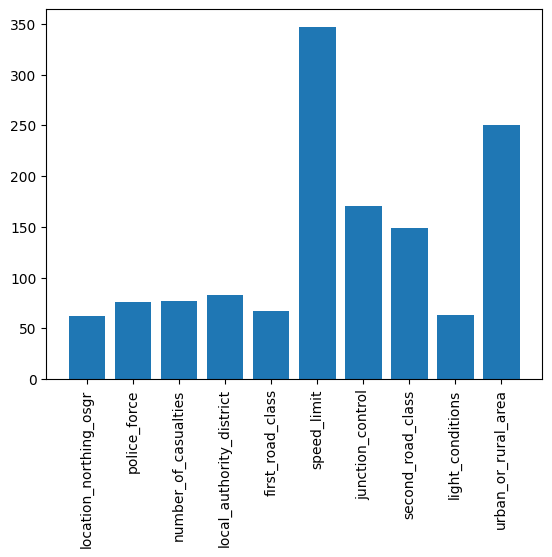

In [150]:
# Let’s plot a bar chart of the features and the scores

plt.bar(names,scores)
plt.xticks(rotation = 'vertical')

#### Classification Models

In [151]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [152]:
X_train, X_test, y_train, y_test = train_test_split(df_acc_balanced, y_balanced, test_size=0.33, random_state=42)

In [153]:
# Define the classification models to evaluate
classifiers = [
    DecisionTreeClassifier(criterion= 'gini', min_samples_leaf= 100),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, criterion= 'gini'),
    SVC(),
    GradientBoostingClassifier(learning_rate=0.1,),
    xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    LogisticRegression(),

]

# Iterate over the classification models and evaluate their performance
for classifier in classifiers:
    # Scale the model to the training data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Fit the model to the training ata
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Calculate the accuracy of the classifier
    print("Model:", type(classifier).__name__)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    # Print classification report and confusion matrix
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

          
    print("--------------------------------------")
    



Model: DecisionTreeClassifier
Accuracy: 0.6996735582154516
              precision    recall  f1-score   support

       False       0.69      0.74      0.71       464
        True       0.71      0.66      0.68       455

    accuracy                           0.70       919
   macro avg       0.70      0.70      0.70       919
weighted avg       0.70      0.70      0.70       919

[[343 121]
 [155 300]]
--------------------------------------
Model: GaussianNB
Accuracy: 0.5952121871599565
              precision    recall  f1-score   support

       False       0.69      0.35      0.47       464
        True       0.56      0.84      0.67       455

    accuracy                           0.60       919
   macro avg       0.63      0.60      0.57       919
weighted avg       0.63      0.60      0.57       919

[[164 300]
 [ 72 383]]
--------------------------------------
Model: RandomForestClassifier
Accuracy: 0.6887921653971708
              precision    recall  f1-score   support

  

### Classification with clean data

In [154]:
modified_df

,accident_severity,number_of_vehicles,number_of_casualties,road_type,speed_limit,latitude,light_conditions,weather_conditions,road_surface_conditions,casualty_severity,longitude,vehicle_type,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle,casualty_class,sex_of_casualty,age_of_casualty,pedestrian_location
0,3,1,1,6,20.0,51.462262,1.0,9.0,9.0,3,-0.254001,9,2.0,32.0,1968.0,6.0,3,1.0,31.0,9.0
1,2,2,1,6,30.0,51.455133,1.0,1.0,2.0,2,-0.254734,9,2.0,30.0,1248.0,5.0,1,1.0,39.0,0.0
2,2,2,1,6,30.0,51.455133,1.0,1.0,2.0,2,-0.254734,1,1.0,39.0,1598.0,7.0,1,1.0,39.0,0.0
3,3,2,1,6,60.0,51.460148,1.0,1.0,1.0,3,-0.251563,1,2.0,31.0,1598.0,7.0,1,2.0,31.0,0.0
4,3,2,1,6,60.0,51.460148,1.0,1.0,1.0,3,-0.251563,9,3.0,38.0,1598.0,7.0,1,2.0,31.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,2,2,3,6,60.0,52.444677,6.0,2.0,2.0,3,-3.538477,21,1.0,64.0,10837.0,3.0,2,2.0,68.0,0.0
201939,2,2,3,6,60.0,52.444677,6.0,2.0,2.0,2,-3.538477,9,2.0,38.0,1685.0,5.0,2,1.0,42.0,0.0
201940,2,2,3,6,60.0,52.444677,6.0,2.0,2.0,2,-3.538477,21,1.0,64.0,10837.0,3.0,2,1.0,42.0,0.0
201941,2,2,1,6,30.0,52.517700,5.0,2.0,2.0,2,-3.313323,9,1.0,49.0,1956.0,4.0,1,2.0,51.0,0.0


In [155]:
y_label = modified_df['accident_severity']==1
y_label

0         False
1         False
2         False
3         False
4         False
          ...  
201938    False
201939    False
201940    False
201941    False
201942    False
Name: accident_severity, Length: 201943, dtype: bool

In [156]:
y_label.value_counts()

False    198271
True       3672
Name: accident_severity, dtype: int64

### Balancing the dataset

In [157]:
modified_df_drop = modified_df

In [158]:
modified_df_drop

,accident_severity,number_of_vehicles,number_of_casualties,road_type,speed_limit,latitude,light_conditions,weather_conditions,road_surface_conditions,casualty_severity,longitude,vehicle_type,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle,casualty_class,sex_of_casualty,age_of_casualty,pedestrian_location
0,3,1,1,6,20.0,51.462262,1.0,9.0,9.0,3,-0.254001,9,2.0,32.0,1968.0,6.0,3,1.0,31.0,9.0
1,2,2,1,6,30.0,51.455133,1.0,1.0,2.0,2,-0.254734,9,2.0,30.0,1248.0,5.0,1,1.0,39.0,0.0
2,2,2,1,6,30.0,51.455133,1.0,1.0,2.0,2,-0.254734,1,1.0,39.0,1598.0,7.0,1,1.0,39.0,0.0
3,3,2,1,6,60.0,51.460148,1.0,1.0,1.0,3,-0.251563,1,2.0,31.0,1598.0,7.0,1,2.0,31.0,0.0
4,3,2,1,6,60.0,51.460148,1.0,1.0,1.0,3,-0.251563,9,3.0,38.0,1598.0,7.0,1,2.0,31.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201938,2,2,3,6,60.0,52.444677,6.0,2.0,2.0,3,-3.538477,21,1.0,64.0,10837.0,3.0,2,2.0,68.0,0.0
201939,2,2,3,6,60.0,52.444677,6.0,2.0,2.0,2,-3.538477,9,2.0,38.0,1685.0,5.0,2,1.0,42.0,0.0
201940,2,2,3,6,60.0,52.444677,6.0,2.0,2.0,2,-3.538477,21,1.0,64.0,10837.0,3.0,2,1.0,42.0,0.0
201941,2,2,1,6,30.0,52.517700,5.0,2.0,2.0,2,-3.313323,9,1.0,49.0,1956.0,4.0,1,2.0,51.0,0.0


In [159]:
modified_df_balanced, y_balanced = RandomUnderSampler().fit_resample(modified_df_drop, y_label)

In [160]:
modified_df_balanced

,accident_severity,number_of_vehicles,number_of_casualties,road_type,speed_limit,latitude,light_conditions,weather_conditions,road_surface_conditions,casualty_severity,longitude,vehicle_type,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle,casualty_class,sex_of_casualty,age_of_casualty,pedestrian_location
0,3,2,1,2,30.0,51.516158,1.0,1.0,1.0,3,-0.069456,9,2.0,61.0,1595.0,13.0,1,1.0,32.0,0.0
1,3,1,2,6,20.0,51.463512,4.0,1.0,1.0,3,-0.133167,9,3.0,38.0,2967.0,14.0,3,2.0,35.0,5.0
2,3,2,1,6,30.0,51.630079,4.0,8.0,2.0,3,-3.455364,9,1.0,53.0,1997.0,7.0,1,1.0,24.0,0.0
3,3,2,1,6,50.0,53.212714,1.0,1.0,1.0,3,-2.849240,9,2.0,38.0,1197.0,5.0,1,2.0,44.0,0.0
4,2,1,2,3,50.0,53.265609,1.0,1.0,1.0,2,-2.985569,5,1.0,57.0,500.0,61.0,2,2.0,55.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,1,6,1,6,60.0,52.082186,1.0,1.0,1.0,1,-3.139679,9,1.0,54.0,1781.0,17.0,1,2.0,84.0,0.0
7340,1,6,1,6,60.0,52.082186,1.0,1.0,1.0,1,-3.139679,9,2.0,41.0,1598.0,10.0,1,2.0,84.0,0.0
7341,1,6,1,6,60.0,52.082186,1.0,1.0,1.0,1,-3.139679,9,1.0,25.0,1248.0,7.0,1,2.0,84.0,0.0
7342,1,6,1,6,60.0,52.082186,1.0,1.0,1.0,1,-3.139679,19,1.0,60.0,1598.0,7.0,1,2.0,84.0,0.0


### Feature selection using filtering

In [161]:
modified_df_balanced = modified_df_balanced.drop(['accident_severity'], axis = 1)

In [162]:
modified_df_balanced = modified_df_balanced.select_dtypes([np.number])

In [163]:
modified_df_balanced

,number_of_vehicles,number_of_casualties,road_type,speed_limit,latitude,light_conditions,weather_conditions,road_surface_conditions,casualty_severity,longitude,vehicle_type,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle,casualty_class,sex_of_casualty,age_of_casualty,pedestrian_location
0,2,1,2,30.0,51.516158,1.0,1.0,1.0,3,-0.069456,9,2.0,61.0,1595.0,13.0,1,1.0,32.0,0.0
1,1,2,6,20.0,51.463512,4.0,1.0,1.0,3,-0.133167,9,3.0,38.0,2967.0,14.0,3,2.0,35.0,5.0
2,2,1,6,30.0,51.630079,4.0,8.0,2.0,3,-3.455364,9,1.0,53.0,1997.0,7.0,1,1.0,24.0,0.0
3,2,1,6,50.0,53.212714,1.0,1.0,1.0,3,-2.849240,9,2.0,38.0,1197.0,5.0,1,2.0,44.0,0.0
4,1,2,3,50.0,53.265609,1.0,1.0,1.0,2,-2.985569,5,1.0,57.0,500.0,61.0,2,2.0,55.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7339,6,1,6,60.0,52.082186,1.0,1.0,1.0,1,-3.139679,9,1.0,54.0,1781.0,17.0,1,2.0,84.0,0.0
7340,6,1,6,60.0,52.082186,1.0,1.0,1.0,1,-3.139679,9,2.0,41.0,1598.0,10.0,1,2.0,84.0,0.0
7341,6,1,6,60.0,52.082186,1.0,1.0,1.0,1,-3.139679,9,1.0,25.0,1248.0,7.0,1,2.0,84.0,0.0
7342,6,1,6,60.0,52.082186,1.0,1.0,1.0,1,-3.139679,19,1.0,60.0,1598.0,7.0,1,2.0,84.0,0.0


In [164]:
from sklearn.feature_selection import SelectKBest, f_classif

In [165]:
selector = SelectKBest(f_classif, k = 10)
selector.fit(modified_df_balanced, y_balanced)

SelectKBest()

In [166]:
mask = selector.get_support()

In [167]:
names = selector.feature_names_in_[mask]

In [168]:
scores = selector.scores_[mask]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'number_of_vehicles'),
  Text(1, 0, 'number_of_casualties'),
  Text(2, 0, 'speed_limit'),
  Text(3, 0, 'light_conditions'),
  Text(4, 0, 'casualty_severity'),
  Text(5, 0, 'sex_of_driver'),
  Text(6, 0, 'age_of_driver'),
  Text(7, 0, 'engine_capacity_cc'),
  Text(8, 0, 'casualty_class'),
  Text(9, 0, 'age_of_casualty')])

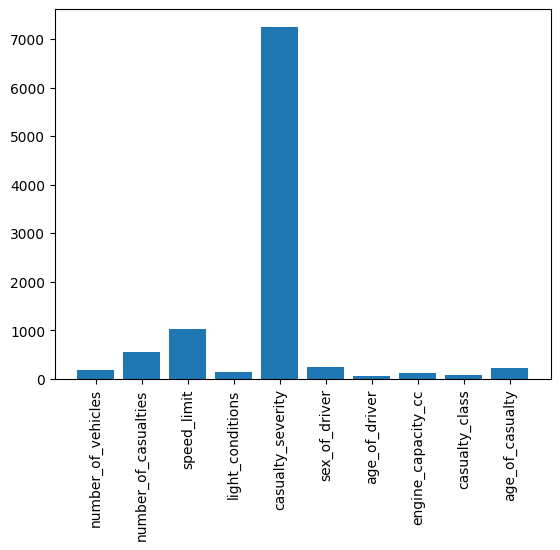

In [169]:
# Let’s plot a bar chart of the features and the scores

plt.bar(names,scores)
plt.xticks(rotation = 'vertical')

#### Classification Model

In [170]:
X_train, X_test, y_train, y_test = train_test_split(modified_df_balanced, y_balanced, test_size=0.33, random_state=42)

In [171]:
# Define the classification models to evaluate
classifiers = [
    DecisionTreeClassifier(criterion= 'gini', min_samples_leaf= 100),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, criterion= 'gini'),
    SVC(),
    GradientBoostingClassifier(learning_rate=0.1,),
    xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    LogisticRegression(),

]

# Iterate over the classification models and evaluate their performance
for classifier in classifiers:
    # Scale the model to the training data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Fit the model to the training ata
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Calculate the accuracy of the classifier
    print("Model:", type(classifier).__name__)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    
    # Print classification report and confusion matrix
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

          
    print("--------------------------------------")
    



Model: DecisionTreeClassifier
Accuracy: 0.898102310231023
              precision    recall  f1-score   support

       False       0.89      0.91      0.90      1234
        True       0.91      0.88      0.89      1190

    accuracy                           0.90      2424
   macro avg       0.90      0.90      0.90      2424
weighted avg       0.90      0.90      0.90      2424

[[1129  105]
 [ 142 1048]]
--------------------------------------
Model: GaussianNB
Accuracy: 0.8502475247524752
              precision    recall  f1-score   support

       False       0.86      0.84      0.85      1234
        True       0.84      0.86      0.85      1190

    accuracy                           0.85      2424
   macro avg       0.85      0.85      0.85      2424
weighted avg       0.85      0.85      0.85      2424

[[1041  193]
 [ 170 1020]]
--------------------------------------
Model: RandomForestClassifier
Accuracy: 0.9405940594059405
              precision    recall  f1-score   supp